<a href="https://colab.research.google.com/github/agustinbrusco/Physics-and-Math-Plots/blob/main/Graficos_Interactivos_Mate_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#$\text{Visualización de conceptos de análisis complejo}$
##$\text{Autor:}$ [Agustín Brusco](agustin.brusco@gmail.com)

# Importes y definiciones

Si no se ejecutan estas celdas, el código de más abajo no va a funcionar.

Darle "play" :)

In [ ]:
#@title Imports

import numpy as np  # Para el cálculo numérico
import sympy as sym  # Para cálculo simbolico y detalles esteticos
from scipy.special import factorial  # Versión vectorizada de n! = n×(n-1)!
import matplotlib.pyplot as plt  # Para el gráfico de las funciones
from matplotlib.colors import Normalize, Colormap  # Para el coloreo dinamico
from matplotlib import ticker  # Detalles para ejes/barras de color
from matplotlib import rcParams  # Para aumentar la resolución de los gráficos
%config InlineBackend.figure_format='retina'
rcParams['font.family'] = 'serif'

# Para graficar superficies de Riemann en 3D
!pip install jupyter-dash -q
from jupyter_dash import JupyterDash
import dash_html_components as html
import dash_core_components as dcc
# import dash_daq as daq
from dash.dependencies import Output, Input
import plotly.graph_objects as go  

In [2]:
#@title def forma_binomica, def forma_exponencial, def raices_enesimas, def positive_angle

def forma_binomica(z, show=False):
    '''
    Expresa en forma binomica al número complejo z devolviendo por separado la 
    parte real y la parte imaginaria. Si __show=True__ el resultado además se
    imprime en latex.
    '''
    a = np.real(z)
    b = np.imag(z)
    if show:
        display(sym.Eq(sym.symbols('z'), a + 1j*b))
    return a, b
 
def forma_exponencial(z, show=False):
    '''
    Expresa en forma exponencial al número complejo z devolviendo por separado
    su magnitud y su argumento o fase. Si __show=True__ el resultado además se
    imprime en latex.
    '''
    r = np.abs(z)
    theta = np.angle(z)
    if show:
        display(sym.Eq(sym.symbols('z'), r*sym.exp(1j*theta/np.pi*sym.pi)))
    return r, theta
 
def raices_enesimas(z0, n, j=None):
    '''
    Calcula las __n__ raíces enésimas del número complejo __z0__.
    Devuelve la jotaésima si el argumento __j__ es un número entero
    menor que __n__ y mayor o igual que 0. En cualquier otro caso,
    devuelve un array con las __n__ raíces.
    Obs: Si se quiere vectorizar esta función (i.e. ingresar un array
    __z0__ en vez de un número complejo) debe especificarse un __j__
    válido.
    '''
    r0, theta0 = forma_exponencial(z0)
    if j in set(range(n)):
        zj = (r0**(1/n))*np.exp(1j*(theta0 + 2*j*np.pi)/n)
        return zj
    elif j is not None:
        raise ValueError('j debería ser un entero en el rango [0, n-1]')
    else:
        k = np.arange(0, n)
        zk = (r0**(1/n))*np.exp(1j*(theta0 + 2*k*np.pi)/n)
        return zk

def positive_angle(z):
    '''
    Dado un array __z__, devuelve el argumento complejo para cada
    valor de __z__ en el rango [0, 2π).
    '''
    theta = np.angle(z)
    mask = theta < 0
    theta[mask] += 2*np.pi
    return theta

In [3]:
# @title def graficar_sucesion { display-mode: "form" }
 
def graficar_sucesion(s, nmax=75, suma=False, cmap='plasma'):
    '''
    Grafica la sucesión compleja "s" para valores de n naturales hasta "nmax".
    
    Parametros
    ----------
        s : str
            Expresión en función de un solo parametro entero n tal que
            s(n) = z_n, el elemento enésimo de la sucesión.
            Ej: s='exp(1j/5*n*pi)/n'
        nmax : int, default : 75
            Máximo valor que tomará n. Es decir, hasta que elemento debe
            graficarse la sucesión.
        suma : bool, default : False
            Grafica además la sumatoria S = Σz_n desde n = 1 hasta n = nmax.
        cmap : str, default : 'plasma'
            Nombre del mapa de color de matplotlib.cm que coloreará el gráfico.
            Ej: cmap='cool'
            Referencia:
            https://matplotlib.org/stable/gallery/color/colormap_reference.html
    Devuelve
    --------
        fig, ax/axs : Figura y Eje (o ejes) del gráfico generado.
 
    '''
    # Transformo el string de la expresión de s a una función simbolica s_sym.
    n = sym.symbols('n', positive=True)  # Defino temporalmente un dominio simbólico.
    s_sym = sym.sympify(s, evaluate=False).subs({'n': n, 'i': sym.I,
                                                 'e': sym.E, 'pi': sym.pi})
    # Obtengo una versión numérica de la función s_sym para evaluarla luego.
    s_num = sym.lambdify(n, s_sym, ['numpy', {'factorial': factorial}])
    n = np.arange(1, nmax+1)  # Defino un dominio numérico.
    z_n = s_num(n)  # Evaluo la versión numérica en el dominio y obtengo la imagen.
    # Separo en casos según la imagen (z_n) pertenece a R o a C.
    if (z_n.imag == 0).all():
        z_n_es_real = True
    else:
        z_n_es_real = False
    # Defino los ejes y figura del gráfico según si se graficará la sumatoria y si z_n pertenece a R o a C.
    if suma and z_n_es_real:
        fig, [ax, ax_s] = plt.subplots(2, 1, dpi=175, constrained_layout=True)
        fig.set_size_inches(8, 5)
    elif suma and not z_n_es_real:
        fig, [ax, ax_s] = plt.subplots(1, 2, dpi=175, constrained_layout=True)
        fig.set_size_inches(8, 5)
    else:
        fig, ax = plt.subplots(1, dpi=175)
        fig.set_size_inches(7, 4)
    fig.set_facecolor('w')
    # Calculo algunas cantidades para definir los mapas de color del gráfico.
    norm = Normalize(n.min(), n.max())  # Un normalizador que asocia valores del intervalo de n al rango [0:1].
    colormap = plt.cm.ScalarMappable(norm, cmap)  # Asocio los valores del rango [0:1] a una secuencia de colores.
    colors = colormap.get_cmap()  # El mapa de color que se utilizará al plotear todo.
    if z_n_es_real:
        z_n = np.real_if_close(z_n)
        for i, ni in enumerate(n):
            # Si z_n son valores reales, grafico n vs z_n.
            ax.plot(n[i:i+2], z_n[i:i+2], '.-', lw=0.25,
                    ms=2.5*(1-i/nmax), c=colors(norm(ni)))
        ax.set_ylabel(r'$z$')
        ax.set_xlabel(r'$n$')
        ax.set_aspect('auto', 'datalim')
        ax.grid()
    else:
        # Si z_n son valores complejos, grafico Re(z_n) vs Im(z_n).
        re = np.real(z_n)
        im = np.imag(z_n)
        for i in n:
            ax.plot(re[i-1:i+1], im[i-1:i+1], '.-', lw=0.5,
                    ms=7.5*(1-i/n.max()), c=colors(norm(i)))
        ax.set_ylabel(r'$\Im(z)$')
        ax.set_xlabel(r'$\Re(z)$')
        ax.set_aspect('equal', 'datalim')
        ax.grid()
        z_n_es_real = False
    if suma:
        # Computo la sumatoria de z_n
        S = np.zeros_like(z_n)
        for i, ni in enumerate(n):
            S[i] = np.sum(z_n[:i+1])  # En el i-ésimo elemento, tiene la sumatoria de los primeros i elementos de z_n.
        if z_n_es_real:
            # Si z_n son valores reales, grafico n vs Σ(z_k).
            for i, ni in enumerate(n):
                ax_s.plot(n[i:i+2], S[i:i+2], '.-', lw=0.25,
                        ms=2.5*(1-i/nmax), c=colors(norm(ni)))
            ax_s.set_ylabel(r'$S_n$')
            ax_s.set_xlabel(r'$n$')
            ax_s.set_aspect('auto', 'datalim')
            ax_s.grid()
        else:
            # Si z_n son valores complejos, grafico Re(Σ(z_k)) vs Im(Σ(z_k)).
            Re = np.real(S)
            Im = np.imag(S)
            for i in n:
                ax_s.plot(Re[i-1:i+1], Im[i-1:i+1], '.-', lw=0.5,
                        ms=7.5*(1-i/n.max()), c=colors(norm(i)))
            ax_s.set_ylabel(r'$\Im(z)$')
            ax_s.set_xlabel(r'$\Re(z)$')
            ax_s.set_aspect('equal', 'datalim')
            ax_s.grid()
    
    if not "Piecewise" in s:  # Esquivo un caso que matplotlib no sabe leer bien (funciones partidas).
        ltx_expr = sym.latex(sym.Eq(sym.sympify('s'), s_sym))
        if z_n_es_real:
            ax.set_title(r'$s:\mathbb{N} \to \mathbb{R}, \qquad$'+
                        f'${ltx_expr}$')
        else:
            ax.set_title(r'$s:\mathbb{N} \to \mathbb{C}, \qquad$'+
                        f'${ltx_expr}$')
        if suma:
            ltx_expr = sym.latex(sym.Eq((sym.sympify('S_n')),
                                        (sym.sympify('Σ('+s.replace('n', 'k')+')'))))
            ax_s.set_title(f'${ltx_expr}$')
    else:
        if z_n_es_real:
            fig.suptitle(r'$s:\mathbb{N} \to \mathbb{R}$')
        else:
            fig.suptitle(r'$s:\mathbb{N} \to \mathbb{C}$')
    if z_n_es_real:
        if suma:
            return fig, [ax, ax_s]
        else:
            return fig, ax
    elif suma:
        plt.colorbar(colormap, ax=[ax, ax_s], label='n', location='bottom')
        return fig, [ax, ax_s]
    else:
        plt.colorbar(colormap, ax=ax, label='n')
        return fig, ax
 
# graficar_sucesion("exp(1j/5*n*pi)/n", 250)
# plt.show()

In [4]:
# @title def sucesion_de_funciones { display-mode: "form" }
 
def sucesion_de_funciones(fn, dom, n0=1, nmax=75, cmap='plasma', suma=False):
    '''
    Grafica la sucesión de funciones "fn" en el dominio "dom" para
    valores de n naturales hasta "nmax". Si se especifica "n0" distinto
    de 1, n tomará valores enteros entre n0 y nmax.
    
    Parametros
    ----------
        fn : str
            Expresión en función de dos parametros parametros tal que
            fn(n, z) = f_n(z), la n-ésima función de la sucesión evaluada en z.
            Ej: fn="z**n"
        dom : array
            Array de números reales que servirá de dominio para funciones f_n.
            Si se quieren evaluar a f_n en imaginarios puros, debe modificarse
            fn tal que fn(n, z) --> fn(n, 1j*z)
            Ej : dom=np.linspace(0, 1, 100)
        n0 : int, default : 1
            Valor mínimo de n. Para series de potencias, es convención
            que la sumatoria empiece en n=0.
        nmax : int, default : 75
            Máximo valor que tomará n. Es decir, hasta que elemento debe
            graficarse la sucesión.
        cmap : str, default : 'plasma'
            Nombre del mapa de color de matplotlib.cm que coloreará el gráfico.
            Ej: cmap='cool'
            Referencia: https://matplotlib.org/stable/gallery/color/colormap_reference.html
        suma : bool, default : False
            Grafica además las sumas parciales S_k(z) = Σf_n(z) desde k = 1
            hasta k = nmax.
    
    Devuelve
    --------
        fig, ax/axs : Figura y Eje (o ejes) del gráfico generado.
    '''
    # Transformo el string de la expresión de fn a una función simbolica fn_sym.
    # Defino temporalmente un dominio simbólico.
    n = sym.symbols('n', integer=True)
    z = sym.symbols('z', complex=True)
    fn_sym = sym.sympify(fn, evaluate=False).subs({'n': n, 'z': z, 'i': sym.I,
                                                 'e': sym.E, 'pi': sym.pi})
    # Obtengo una versión numérica de la función fn_sym para evaluarla luego.
    fn_num = sym.lambdify([n, z], fn_sym, ['numpy', {'factorial': factorial}])
    n = np.arange(n0, nmax+1)  # Defino un dominio numérico para n.
    L = len(n)
    # Calculo algunas cantidades para definir los mapas de color del gráfico.
    norm = Normalize(n.min(), n.max())  # Un normalizador que asocia valores del intervalo de n al rango [0:1].
    colormap = plt.cm.ScalarMappable(norm, cmap)  # Asocio los valores del rango [0:1] a una secuencia de colores.
    colors = colormap.get_cmap()  # El mapa de color que se utilizará al plotear todo.
    lims = (dom.min(), dom.max())
    # Evaluo la función en el dominio para cada n.
    f = np.zeros((n.size, dom.size), np.complex128)
    for i, ni in enumerate(n):
        f[i, :] = fn_num(ni, dom)
    # Separo en casos según la imagen (fn(z)) pertenece a R o a C.
    # Luego defino para cada caso los ejes y figura donde se graficará todo.
    if (f.imag == 0).all():
        f = np.real_if_close(f)
        if suma:
            fig, axs = plt.subplots(1, 2, dpi=175, constrained_layout=True)
            fig.set_size_inches(8, 5)
            ax = axs[0]
        else:
            fig, ax = plt.subplots(1, 1, dpi=175, constrained_layout=True)
            fig.set_size_inches(5, 5)
            axs = [ax]
        for i, ni in enumerate(n):
            # Grafico a f_n en función de dom para cada valor de n.
            ax.plot(dom, f[i, :], '-', alpha=(1-i/(4*L)),
                    lw=(1-i/L), c=colors(norm(ni)))
        ax.set_ylabel(r'$f_n(z)$')
        ax.set_xlabel(r'$z$')
        ax.grid()
        f_es_real = True
    else:
        if suma:
            fig, (axs, axs_sum) = plt.subplots(2, 2, dpi=175, constrained_layout=True)
            fig.set_size_inches(8, 10)
        else:
            fig, axs = plt.subplots(1, 2, dpi=175, constrained_layout=True)
            fig.set_size_inches(8, 5)
        for i, ni in enumerate(n):
            # Grafico las partes real e imaginarias de f_n en función de dom para cada valor de n.
            axs[0].plot(dom, f[i, :].real, '-', alpha=(1-i/(4*L)),
                    lw=(1-i/L), c=colors(norm(ni)))
            axs[1].plot(dom, f[i, :].imag, '-', alpha=(1-i/(4*L)),
                    lw=(1-i/L), c=colors(norm(ni)))
        for ax, ylabel in zip(axs, [r'$\Re(f_n(z))$', r'$\Im(f_n(z))$']):
            ax.set_ylabel(ylabel)
            ax.set_xlabel(r'$z$')
            ax.grid()
        f_es_real = False
    # Se repite lo anterior para la suma de las n funciones.
    if suma:
        # Computo la sumatoria de f_n(z)
        S = np.zeros_like(f)
        for i, ni in enumerate(n):
            S[i, :] = sum(f[:i+1, :])  # En el i-ésimo elemento, tiene la sumatoria de los primeros i elementos de f_n(z).
        if f_es_real:
            for i, ni in enumerate(n):
                # Si son valores reales, grafico dom vs Σ(f_k(z))
                axs[1].plot(dom, S[i, :], '-', alpha=(1-i/(4*L)),
                            lw=(1-i/L), c=colors(norm(ni)))
            axs[1].set_ylabel(r'$S_n(z)$')
            axs[1].set_xlabel(r'$z$')
            axs[1].grid()
        else:
            for i, ni in enumerate(n):
                # Si son valores complejos, grafico por separado parte real e imaginaria.
                axs_sum[0].plot(dom, S[i, :].real, '-', alpha=(1-i/(4*L)),
                                lw=(1-i/L), c=colors(norm(ni)))
                axs_sum[1].plot(dom, S[i, :].imag, '-', alpha=(1-i/(4*L)),
                                lw=(1-i/L), c=colors(norm(ni)))
            for ax, ylabel in zip(axs_sum, [r'$\Re(S_n(z))$', r'$\Im(S_n(z))$']):
                ax.set_ylabel(ylabel)
                ax.set_xlabel(r'$z$')
                ax.grid()
            
    if not "Piecewise" in fn:  # Esquivo un caso que matplotlib no sabe leer bien (funciones partidas).
        ltx_expr = sym.latex(sym.Eq(sym.sympify('f_n(z)'), fn_sym))
        if not f_es_real:
            for ax, tag in zip(axs, ['Re', 'Im']):
                ax.set_title(f'$\\{tag}$' + r'$(f_n):\mathbb{A} \to \mathbb{R}$')
            fig.suptitle(f'${ltx_expr}$')
            if suma:
                for ax, tag in zip(axs_sum, ['Re', 'Im']):
                    ax.set_title(f'$\\{tag}(S_n(z))$' + 
                                    r'$:\mathbb{A} \to \mathbb{R}$')
        else:
            fig.suptitle(r'$f_n:\mathbb{A} \to \mathbb{R}$')
            axs[0].set_title(f'${ltx_expr}$')
            if suma:
                axs[1].set_title(r'$S_n(z) = \sum_{k=' + str(n0) +
                                    r'}^n f_k(z)$')
    else:
        fig.suptitle(r'$f_n:\mathbb{A} \to \mathbb{R}$')
    
    


    plt.colorbar(colormap, ax=axs, label='n', location='bottom')
    if not f_es_real and suma:
        axs = np.concatenate((axs, axs_sum))
    fig.set_facecolor('w')
    return fig, axs

In [5]:
#@title def transformar_espacio { display-mode: "form" }
 
def transformar_espacio(T, dom=(-5, 5), N=72,
                        dens=1000, grid='cartesiana'):
    '''
    Grafica los efectos de aplicar la transformación __T__ a una región cuadrada
    del espacio delimitada por los valores de __dom__, mostrando la
    configuración inicial y final de __N__ rectas verticales
    y __N__ rectas horizontales.
 
    Alternativamente, si se especifica __grid='polar'__, se muestra la
    configuración inicial y final de __N__ circunferencias
    y __N__ rectas radiales.
    
    Parametros
    ----------
        T : str
            Expresión en función de un solo parametro complejo z.
            Ej : T='(z-i)/(z+i)'
        dom : tuple de 2×2 or list of two 2×2 tuples, default : (-5, 5)
            Limites de la región cuadrada o disco del plano complejo cuya
            transformación se quiere conocer.
            En el gráfico polar, se conserva el mayor valor de "dom" para
            definir el radio máximo, mientras que el menor valor
            o bien se considera para el radio mínimo (si es > 0) o bien se
            descarta (si es <= 0), en cuyo caso el radio mínimo es el inverso
            del radio máximo.
            Alternativamente, en el gráfico cartesiano pueden
            especificarse los valores máximos y mínimos para cada eje por
            separado especificandolos con una lista de dos tuplas en dom.
            Ej : dom=(-1500, 1500)
        N : int, default : 72
            Cantidad de rectas que se quieren graficar por eje. Es decir,
            se graficaran 2N rectas en total.
            Alternativamente, cantidad de circunferencias y rectas radiales
            que se quieren graficar.
        dens : int, default : 1000
            Cantidad de puntos complejos que se computaran dentro de cada recta
            o circunferencia.
        grid : {'cartesiana', 'polar'}, default : 'cartesiana'
            Define si se graficara una cuadricula de rectas ('cartesiana') o una
            serie de circunferencias y rectas radiales ('polar').
 
    Devuelve
    --------
        axs : lista con los ejes de los gráficos generados.
    '''
    # Transformo el string de la expresión de T a una función simbolica T_sym.
    z = sym.symbols('z', complex=True)  # Defino temporalmente un dominio simbólico.
    T_sym = sym.sympify(T, evaluate=False).subs({'z': z, 'i': sym.I,
                                                 'e': sym.E, 'pi': sym.pi})
    # Obtengo una versión numérica de la función T_sym para evaluarla luego.
    T_num = sym.lambdify(z, T_sym, ['numpy', {'factorial': factorial}])
    # Preparo los ejes donde voy  a graficar todo.
    fig, axs = plt.subplots(1, 2, dpi=175, constrained_layout=True)
    fig.set_size_inches(8, 4)
    fig.set_facecolor('w')
    # Según el estilo de grid, defino distintos dominios para la transformación.
    if grid not in {'cartesiana', 'polar'}:
        # El caso en el que el usuario introdujo un valor incorrecto.
        raise ValueError("grid debe ser 'cartesiana' o 'polar'")
    if grid == 'cartesiana':
        # Según el formato en el que se especifico el dominio, lo defino como un array.
        if isinstance(dom, tuple):
            X, Y = np.meshgrid(np.linspace(dom[0], dom[1], N),
                               np.linspace(dom[0], dom[1], dens))
            Z1 = X + 1j*Y  # Rectas Verticales
            Z2 = Y + 1j*X  # Rectas Horizontales
        if isinstance(dom, list):
            X1, Y1 = np.meshgrid(np.linspace(dom[0][0], dom[0][1], N),
                                 np.linspace(dom[1][0], dom[1][1], dens))
            X2, Y2 = np.meshgrid(np.linspace(dom[1][0], dom[1][1], N),
                                 np.linspace(dom[0][0], dom[0][1], dens))
            Z1 = X1 + 1j*Y1  # Rectas Verticales
            Z2 = Y2 + 1j*X2  # Rectas Horizontales

        # Loop viejo pero rápido: Primero rectas verticales, luego horizontales
        for Z, cmap, capa in zip([Z1, Z2],
                                ['inferno', 'magma'],
                                [0, 1]):
            W = T_num(Z)  # Evaluo la versión numérica de T en el dominio
            # Estos pasos que siguen son medio dificiles de explicar:
            norm = Normalize(0, N)  # Un normalizador para el rango de valores.
            colormap = plt.cm.ScalarMappable(norm, cmap)  # Asocio colores en cmap con valores entre 0 y 1 mediante el normalizador
            colors = colormap.get_cmap()  # Extraigo el colormap
            # Este loop grafica tanto en el dominio como en la imagen, recta a recta.
            for i, (z, w) in enumerate(zip(Z.transpose(), W.transpose())):
                axs[0].plot(z.real, z.imag, '.', c=colors(norm(i)),
                            alpha=0.75, ms=0.2, zorder=i*2 + capa)
                axs[1].plot(w.real, w.imag, '.', c=colors(norm(i)),
                            alpha=0.75, ms=0.2, zorder=i*2 + capa)

    if grid == 'polar':
        # Según el formato en el que se especifico el dominio, lo defino como un array.
        if isinstance(dom, list):
            raise TypeError("Si el grid es 'polar', dom debe ser una tupla; " +
                             "por ejemplo: dom=(-3, 3)")
        # Ver arriba en la documentación para entender estos pasos.
        if min(dom) <= 0:
            r = np.linspace(1, max(dom), int(np.round(N/2)))
            r1 = np.array(np.concatenate((np.flip(1/r)[:-1], r)))
        elif min(dom) > 0 and min(dom) < 1:
            r_max = np.linspace(1, max(dom), int(np.round(N/2)))
            r_min = np.linspace(min(dom), 1, int(np.round(N/2)))[:-1]
            r1 = np.array(np.concatenate((r_min, r_max)))
        else:
            r1 = np.linspace(min(dom), max(dom), N)
        # Construyo las rectas radiales y las circunferencias.
        R1, Theta1 = np.meshgrid(r1, np.linspace(-np.pi, np.pi, dens))
        r2 = np.linspace(r1.min(), r1.max(), dens)
        R2, Theta2 = np.meshgrid(r2, np.linspace(0, 2*np.pi, N+1)[0:-1])
        # Grafico para las Circunferencias
        Z = R1*np.exp(1j*Theta1)
        W = T_num(Z)  # Evaluo la versión numérica de T en el dominio
        # Más detalles esteticos.
        width = 0.05
        capa = 10
        cmap = 'Greys_r'
        norm = Normalize(0, r1.max()) # de nuevo normalizo y todo eso.
        colormap = plt.cm.ScalarMappable(norm, cmap)
        colors = colormap.get_cmap()
        for i, (z, w) in enumerate(zip(Z.transpose(), W.transpose())):
            colorizer = norm(np.abs(z)[0])  # Coloreo los circulos según su radio.
            axs[0].plot(z.real, z.imag, '.', c=colors(colorizer),
                        ms=width, alpha=0.75, zorder=capa)
            axs[1].plot(w.real, w.imag, '.', c=colors(colorizer),
                        ms=width, alpha=0.75, zorder=capa)
        # Rectas Radiales
        Z = (R2*np.exp(1j*Theta2)).transpose()
        W = T_num(Z)  # Evaluo la versión numérica de T en el dominio
        # (Más detalles esteticos)².
        width = 0.2
        capa = 5
        cmap = 'hsv'
        norm = Normalize(0, 2*np.pi)
        colormap = plt.cm.ScalarMappable(norm, cmap)
        colors = colormap.get_cmap()
        for i, (z, w) in enumerate(zip(Z.transpose(), W.transpose())):
            colorizer = norm(positive_angle(z)[0])  # Coloreo las rectas según su dirección y sentido.
            axs[0].plot(z.real, z.imag, '.', c=colors(colorizer),
                        ms=width, alpha=0.75, zorder=capa)
            axs[1].plot(w.real, w.imag, '.', c=colors(colorizer),
                        ms=width, alpha=0.75, zorder=capa)
    # Detalles de los ejes y título:
    axs[0].set_title(r'$z \in \mathbb{C}$')
    axs[0].set_ylabel(r'$\Im(z)$')
    axs[0].set_xlabel(r'$\Re(z)$')
    # Pongo el título de cada gráfico en Latex.
    ltx_expr = sym.latex(sym.Eq(sym.sympify('T(z)'), T_sym))
    axs[1].set_title(r'$T:\mathbb{C} \to \mathbb{C}, \qquad$'+
                         f'${ltx_expr}$')
    axs[1].set_ylabel(r'$\Im(T(z))$')
    axs[1].set_xlabel(r'$\Re(T(z))$')
    for ax in axs:
        ax.set_aspect('equal', adjustable='datalim')  # Para que los circulos se vean como circulos
        ax.grid(True, zorder=0)  # Para que la grilla de fondo no tape
    return axs

In [6]:
#@title def coloreado_de_dominio { display-mode: "form" }

def veces_pi(val, pos):
    '''
    Función auxiliar para ponerle los ejes a la barra de color de la función
    coloreado_de_dominio.
    '''
    frac = val/np.pi
    epsilon = 1e-10
    if np.abs(frac) < epsilon:
        return '0'
    elif np.abs(frac - 1/4) < epsilon:
        return 'π/4'
    elif np.abs(frac - 1/2) < epsilon:
        return 'π/2'
    elif np.abs(frac - 3/4) < epsilon:
        return '3π/4'
    elif np.abs(frac - 1) < epsilon:
        return 'π'
    elif np.abs(frac - 5/4) < epsilon:
        return '5π/4'
    elif np.abs(frac - 3/2) < epsilon:
        return '3π/2'
    elif np.abs(frac - 7/4) < epsilon:
        return '7π/4'
    elif np.abs(frac - 2) < epsilon:
        return '2π'
    return f'{frac:.2f}π'


def coloreado_de_dominio(T, dom=(-5, 5), N=72, modulo='lineal', ax=None):
    '''
    Grafica los efectos de aplicar la transformación __T__ a una región cuadrada
    del espacio delimitada por los valores de __dom__.
    Parametros
    ----------
        T : str
            Expresión en función de un solo parametro complejo z.
            Ej : T='(z-I)/(z+I)'
        dom : tuple de 2×2 or list of two 2×2 tuples, default : (-5, 5)
            Limites de la región cuadrada cuya transformación se quiere
            visualizar.
            Ej : dom=(-1500, 1500)
        N : int, default : 72
            Cantidad de valores que se quieren graficar por eje. Es decir,
            se graficaran N² puntos en total.
        ax : two matplotlib.axes._subplots.AxesSubplot, default : None
            Eje de matplotlib donde graficar el dominio coloreado.
 
    Devuelve
    --------
        ax : eje de los gráficos generados.
    '''
    # Si no se brindó un eje para graficar, se lo crea.
    if ax is None:
        fig, ax = plt.subplots(1, 1, dpi=150, constrained_layout=True)
        fig.set_size_inches(6, 6)
        fig.set_facecolor('w')
    # Se define un dominio numérico cuadrado
    X, Y = np.meshgrid(np.linspace(dom[0], dom[1], N),
                       np.linspace(dom[0], dom[1], N))
    Z = X + 1j*Y  # Se transforma el dominio de R² a C
    # Transformo el string de la expresión de T a una función simbolica T_sym.
    z = sym.symbols('z', complex=True)  # Defino temporalmente un dominio simbólico.
    T_sym = sym.sympify(T, evaluate=False).subs({'z': z, 'i': sym.I,
                                                 'e': sym.E, 'pi': sym.pi})
    # Obtengo una versión numérica de la función T_sym para evaluarla luego.
    T_num = sym.lambdify(z, T_sym, ['numpy', {'factorial': factorial}])
    W = T_num(Z)  # Evaluo la versión numérica en el dominio cuadrado de C y obtengo la imagen.
    R = np.abs(W)  # Calculo su magnitud.
    Theta = positive_angle(W)  # Calculo su argumento entre 0 y 2π.
    # Defino el mapa de colores utilizado para colorear el dominio según el argumento.
    cmap = 'hsv'
    color_norm = Normalize(0, 2*np.pi)
    colormap = plt.cm.ScalarMappable(color_norm, cmap)
    colors = colormap.get_cmap()
    # Utilizo la función imshow para graficar una imagen coloreada sobre el dominio.
    phase = ax.imshow(Theta, cmap=colors, norm=color_norm,
                      aspect='equal', origin='lower',
                      interpolation='gaussian',
                      extent=(dom[0], dom[1], dom[0], dom[1]))
    # Utilizo la función contourf para modificar la claridad de la imagen según la magmnitud de la imagen.
    if modulo == 'log':
        # Si se especificó "log" uso escala logaritmica.
        mod = ax.contourf(Z.real, Z.imag, R,
                          locator=ticker.LogLocator(), cmap='Greys_r',
                          alpha=0.45)
        ax.contour(Z.real, Z.imag, R,
                          locator=ticker.LogLocator(), cmap='Greys_r',
                          alpha=0.45, linewidths=1.)
        plt.colorbar(mod, ax=ax, orientation='horizontal',
                     label='$|T(z)|$')
    elif modulo == 'lineal':
        # Si se especificó "lineal" uso escala lineal.
        mod = ax.contourf(Z.real, Z.imag, R, cmap='Greys_r',
                          alpha=0.45)
        ax.contour(Z.real, Z.imag, R, cmap='Greys_r',
                          alpha=0.45, linewidths=1.)
        plt.colorbar(mod, ax=ax, orientation='horizontal',
                        label='$|T(z)|$')
    # Coloco la barra de color que indica la relación entre colores y argumentos
    plt.colorbar(phase, ax=ax, orientation='vertical',
                 label='$arg(T(z))$',
                 ticks=np.linspace(0, 2*np.pi, 5),
                 format=ticker.FuncFormatter(veces_pi))
    # Coloco los titulos de los ejes
    ax.set_ylabel(r'$\Im(z)$')
    ax.set_xlabel(r'$\Re(z)$')
    # Obtengo una expresión en latex de la función dada por el usuario.
    ltx_expr = sym.latex(sym.Eq(sym.sympify('T(z)'), T_sym))
    ax.set_title(r'$T:\mathbb{C} \to \mathbb{C}, \qquad$'+
                 f'${ltx_expr}$')
    return ax

In [7]:
#@title def superficie_de_riemann { display-mode: "form" }
# import plotly
# from IPython.core.display import HTML
# plotly.offline.init_notebook_mode(connected=False)

# # The polling here is to ensure that plotly.js has already been loaded before
# # setting display alignment in order to avoid a race condition.
# display(HTML(
#     '<script>'
#         'var waitForPlotly = setInterval( function() {'
#             'if( typeof(window.Plotly) !== "undefined" ){'
#                 'MathJax.Hub.Config({ SVG: { font: "STIX-Web" }, displayAlign: "center" });'
#                 'MathJax.Hub.Queue(["setRenderer", MathJax.Hub, "SVG"]);'
#                 'clearInterval(waitForPlotly);'
#             '}}, 250 );'
#     '</script>'
# ))

def superficie_de_riemann(T, dom_re=(-5, 5), dom_im=(-5, 5), N=100, altura='abs_lineal'):
    '''
    Grafica la superficie de Riemann para una función __T__ en una región
    cuadrada del espacio delimitada por los valores de __dom__.
    Parametros
    ----------
        T : str
            Expresión en función de un solo parametro complejo z.
            Ej : T='(z-I)/(z+I)'
        dom_re, dom_im : tuple de 2×2, default : (-5, 5)
            Limites de la parte real e imaginaria respectivamente del dominio
            cuya transformación se quiere
            visualizar.
            Ej : dom_re=(-10, 10), dom_im=(-np.pi, np.pi)
        N : int, default : 100
            Cantidad de valores que se quieren graficar por eje. Es decir,
            se graficaran N² puntos en total.
        altura : {"abs_lineal", "abs_log", "Re", "Im"}, default : "abs_lineal"
            Cantidad que debe representar la altura de la gráfica. 
 
    Devuelve
    --------
        fig : figura de los gráficos generados.
    '''
    # Se define un dominio numérico cuadrado
    X, Y = np.meshgrid(np.linspace(dom_re[0], dom_re[1], N),
                       np.linspace(dom_im[0], dom_im[1], N))
    Z = X + 1j*Y  # Se transforma el dominio de R² a C
    # Transformo el string de la expresión de T a una función simbolica T_sym.
    z = sym.symbols('z', complex=True)  # Defino temporalmente un dominio simbólico.
    T_sym = sym.sympify(T, evaluate=False).subs({'z': z, 'i': sym.I,
                                                 'e': sym.E, 'pi': sym.pi})
    # Obtengo una versión numérica de la función T_sym para evaluarla luego.
    T_num = sym.lambdify(z, T_sym, ['numpy', {'factorial': factorial}])
    W = T_num(Z)  # Evaluo la versión numérica en el dominio cuadrado de C y obtengo la imagen.
    W[np.isinf(W)] = np.nan
    if altura == 'abs_log':
        H = np.log(np.abs(W))  # Calculo el logaritmo natural de su magnitud.
        z_title = 'log(|f|)'
    elif altura == 'Re':
        H = W.real  # Calculo su parte real.
        z_title = 'Re(f)'
    elif altura == 'Im':
        H = W.imag  # Calculo su parte imaginaria.
        z_title = 'Im(f)'
    else:
        H = np.abs(W)  # Calculo su magnitud.
        z_title = '|f|'
    Theta = positive_angle(W)  # Calculo su argumento entre 0 y 2π.
    ltx_expr = sym.latex(T)  # Obtengo una expresión en latex de la función.

    # Defino el mapa de colores utilizado para colorear el dominio según el argumento.
    # Utilizo la función imshow para graficar una imagen coloreada sobre el dominio.
    fig = go.Figure(data=[go.Surface(x=X[0, :], y=Y[:, 0], z=H, surfacecolor=Theta,
                                     colorscale='hsv', cmid=np.pi)])
    fig.update_traces(contours_z=dict(show=True, usecolormap=False,
                              highlightcolor="black", project_z=True,
                              color= 'rgb(0,0,0)'))
    fig.update_layout(title={'text': r'$f(x,y) = '+ltx_expr+'$',
                             'y':0.95, 'x':0.5,
                             'xanchor': 'center', 'yanchor': 'top',},
                      autosize=False, margin=dict(l=0, r=50, b=0, t=60),
                      scene={'xaxis_title': 'Re(z)',
                             'yaxis_title': 'Im(z)',
                             'zaxis_title': z_title,
                             'camera_eye': dict(x=-1.25, y=-1.25, z=1.25)},
                      coloraxis_colorbar_title='$\arg(f)$',
                      width=700, height=700,)
    return fig


In [ ]:
# @title ~Proximamente~: def graficar_curva  (Proyecto abandonado) { display-mode: "form" }
# @markdown Todavía actualizando está función. De por sí no es tan útil ni original como las otras.
def graficar_curva(gamma, dom=[0, 1], dens=1000, T=lambda z: z,
                   cmap='winter', gamma_str=None, T_str=None):
    '''
    Grafica la curva "gamma" de R a C para valores de t en "dom" utilizando
    como función de la parametrización dada. Opcionalmente, le aplica la
    transformación T y muestra su imagen.
    
    Parametros
    ----------
        gamma : function (preferentemente lambda)
            Función de python de un solo parámetro tal que gamma(t) = z(t),
            el valor de la curva a tiempo t.
            Ej: gamma=(lambda t: np.exp(1j*t*2*np.pi))
        dom : 2 element list or tuple, default : [0, 1]
            Limites reales del dominio de gamma.
        dens ; int, default : 1000
            Cantidad de valores de t a cálcular en el intervalo.
        T : function (preferentemente lambda)
            Función de python de un solo parametro complejo.
            Ej : T=lambda z: (z-1j)/(z+1j)
        cmap : str, default : 'winter'
            Nombre del mapa de color de matplotlib.cm que coloreará el gráfico.
            Ej: cmap='cool'
            Referencia:
            https://matplotlib.org/stable/gallery/color/colormap_reference.html
        gamma_str : str or None, default : None
            Expresión textual de gamma (es decir, cómo se escribiría en texto)
            para ser colocada en el título del gráfico.
            Ej : 't*exp(1j*2*pi*t)'
         T_str : str or None, default : None
            Expresión textual de T (es decir, cómo se escribiría en texto) para
            ser colocada en el título del gráfico imagen.
            Ej : '(z-i)/(z+i)'
    Devuelve
    --------
        fig, ax/axs : Figura y Eje (o ejes) del gráfico generado.
 
    '''
    # Calculo del dominio y la imagen de la curva
    t = np.linspace(dom[0], dom[1], dens)
    z_t = gamma(t)
    re = np.real(z_t)
    im = np.imag(z_t)
    w_t = T(z_t)
    # Definición de los ejes del gráfico y los colores.
    if (z_t == w_t).all():
        aplicar_T = False
        fig, ax = plt.subplots(1, dpi=175)
    else:
        aplicar_T = True
        fig, axs = plt.subplots(1, 2, dpi=175, constrained_layout=True)
        fig.set_size_inches(8, 5)
        ax = axs[0]
    norm = Normalize(t.min(), t.max())
    colormap = plt.cm.ScalarMappable(norm, cmap)
    colors = colormap.get_cmap()
    # Grafico de la curva por segmentos de colores
    for i, t_i in enumerate(t):
        ax.plot(re[i], im[i], '.', c=colors(norm(t_i)), ms=1.5)
    if np.abs(z_t[0] - z_t[-1]) < 1e-15:
        ax.plot(re[0], im[0], 'o', c=colors(norm(t[0])), ms=3)
        ax.text(re[0], im[0], "$z_0$", color="black", fontsize=12)
    else:
        ax.plot(re[0], im[0], 'o', c=colors(norm(t[0])), ms=3)
        ax.text(re[0], im[0], "$z_0$", color="black", fontsize=12)
        ax.plot(re[-1], im[-1], 'o', c=colors(norm(t[-1])), ms=3)
        ax.text(re[-1], im[-1], "$z_1$", color="black", fontsize=12)
    ax.set_ylabel(r'$\Im(z)$')
    ax.set_xlabel(r'$\Re(z)$')
    ax.set_aspect('equal', 'datalim')
    ax.grid()
    if aplicar_T:
        re = np.real(w_t)
        im = np.imag(w_t)
        for i, t_i in enumerate(t):
            axs[1].plot(re[i], im[i], '.', c=colors(norm(t_i)), ms=1.5)
        if np.abs(z_t[0] - z_t[-1]) < 1e-15:
            axs[1].plot(re[0], im[0], 'o', c=colors(norm(t[0])), ms=3)
            axs[1].text(re[0], im[0], "$T(z_0)$", color="black", fontsize=12)
        else:
            axs[1].plot(re[0], im[0], 'o', c=colors(norm(t[0])), ms=3)
            axs[1].text(re[0], im[0], "$T(z_0)$", color="black", fontsize=12)
            axs[1].plot(re[-1], im[-1], 'o', c=colors(norm(t[-1])), ms=3)
            axs[1].text(re[-1], im[-1], "$T(z_1)$", color="black", fontsize=12)
        axs[1].set_ylabel(r'$\Im(T(z))$')
        axs[1].set_xlabel(r'$\Re(T(z))$')
        axs[1].set_aspect('equal', 'datalim')
        axs[1].grid()
    if not isinstance(gamma_str, type(None)):
        ltx_expr = sym.latex(sym.Eq(sym.sympify('Gamma'),
                                  sym.sympify(gamma_str)))
        ax.set_title(r'$\Gamma:\mathbb{R} \to \mathbb{C}, \qquad$'+
                         f'${ltx_expr}$')
    else:
        ax.set_title(r'$\Gamma:\mathbb{R} \to \mathbb{C}$')
    if aplicar_T:
        if not isinstance(T_str, type(None)):
            ltx_expr = sym.latex(sym.Eq(sym.sympify('T'),
                                    sym.sympify(T_str)))
            axs[1].set_title(r'$T:\mathbb{C} \to \mathbb{C}, \qquad$'+
                            f'${ltx_expr}$')
        else:
            axs[1].set_title(r'$T:\mathbb{C} \to \mathbb{C}$')
    if aplicar_T:
        plt.colorbar(colormap, ax=axs, label='t', orientation='horizontal')
        return fig, axs
    else:
        plt.colorbar(colormap, ax=ax, label='t')
        return fig, ax

# Ejemplos de Gráficos

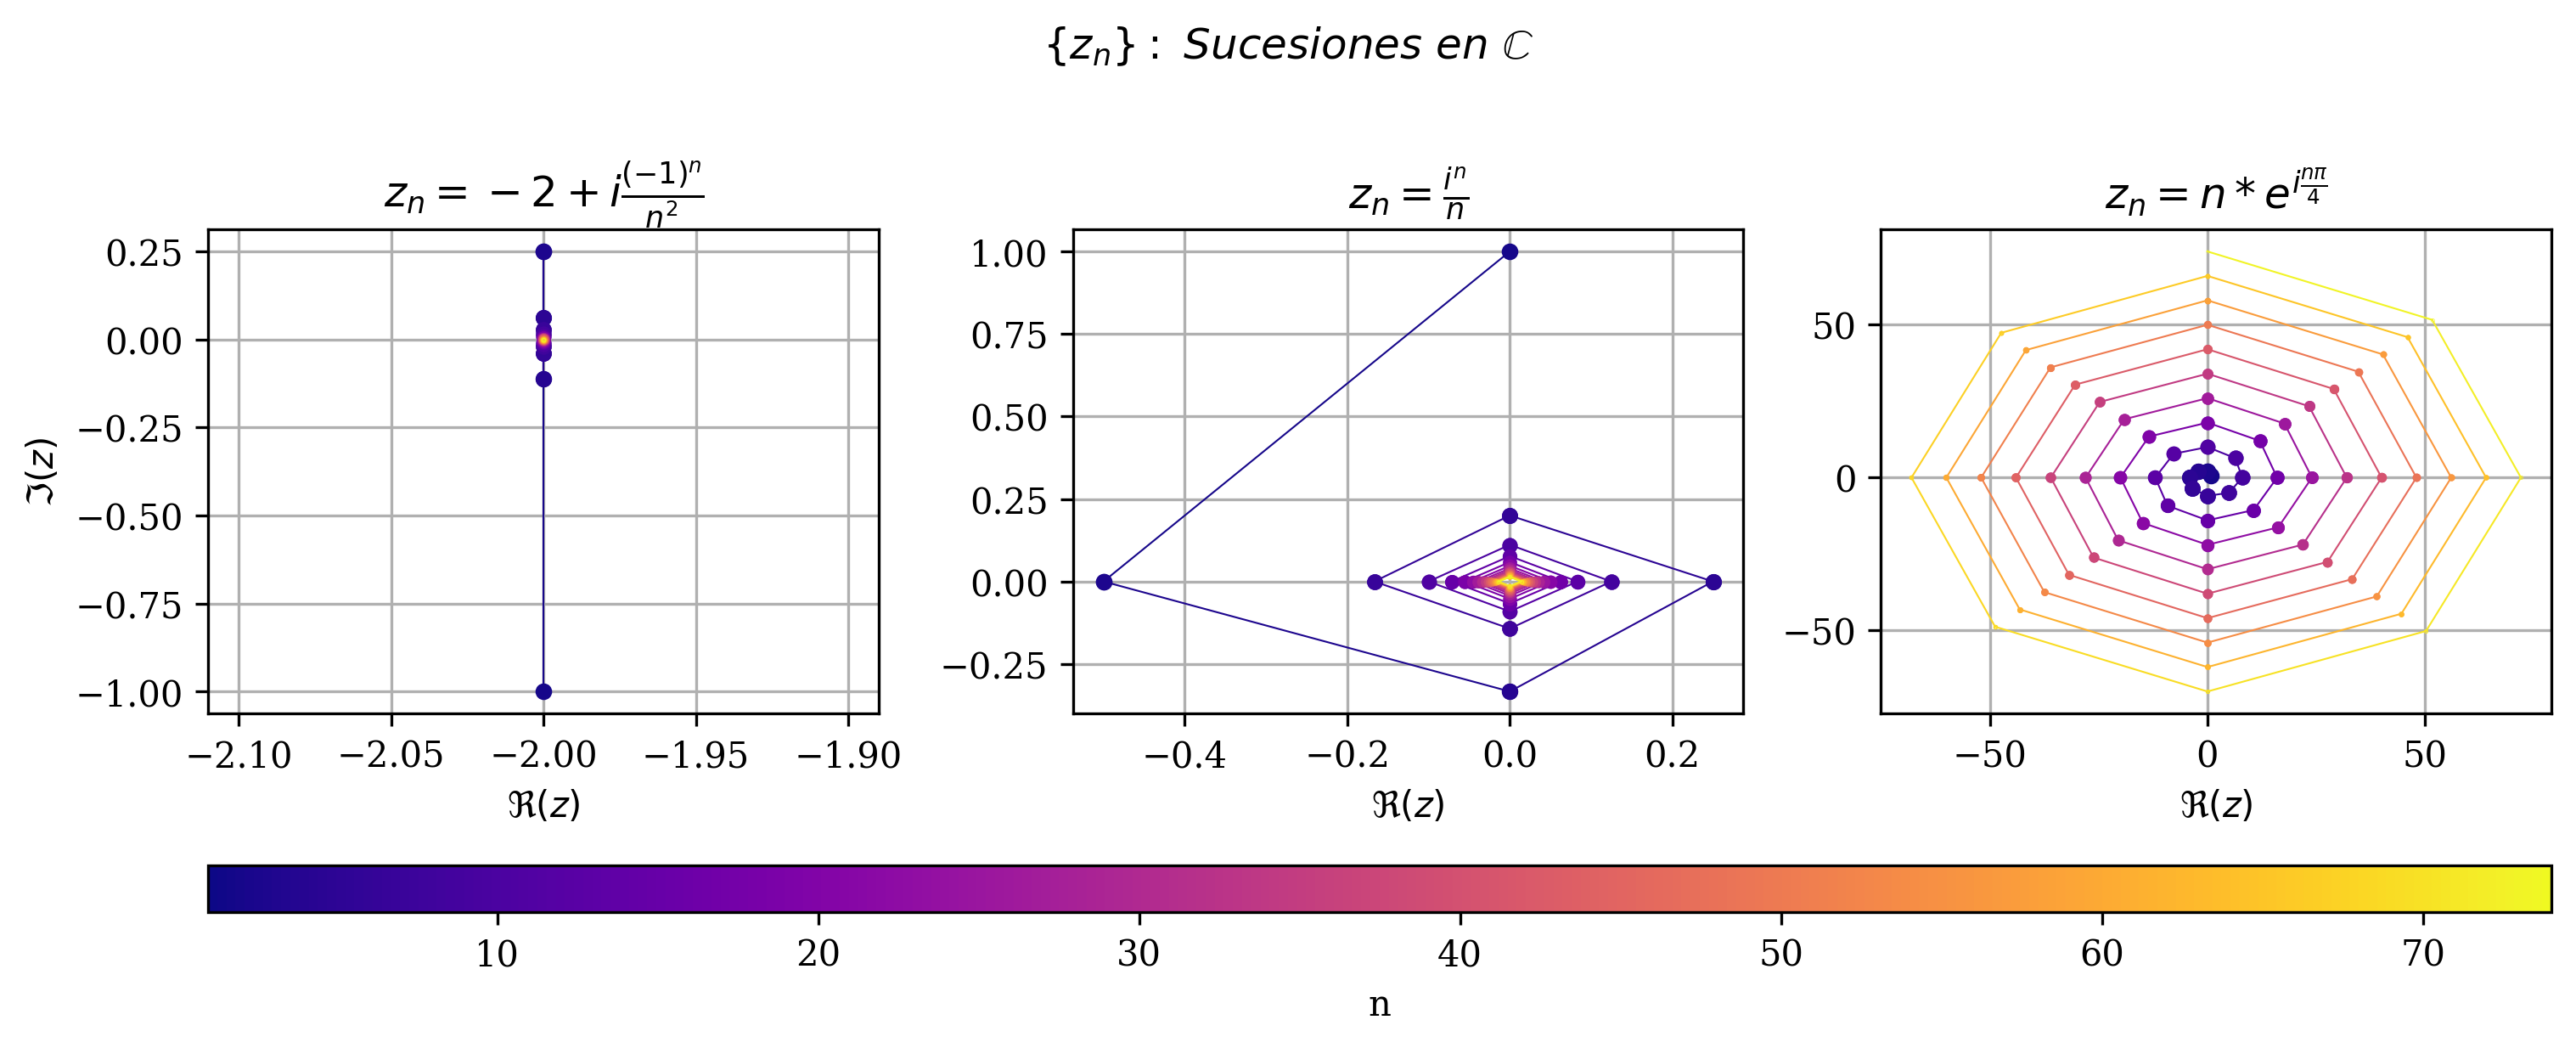

In [ ]:
#@title Ejemplos de Sucesión de la clase del 31/03 { display-mode: "form" }
n = np.arange(1, 75)
 
fig, axs = plt.subplots(1, 3, dpi=150, constrained_layout=True)
fig.set_size_inches(10, 4)
plt.suptitle(r'$\{z_n\}: \ Sucesiones\ en\ \mathbb{C}$'+'\n')
colormap = plt.cm.ScalarMappable(Normalize(n.min(), n.max()), 'plasma')
colors = colormap.get_cmap()
 
axs[0].set_title(r'$z_n = -2 + i\frac{(-1)^n}{n^2}$')
z_n = -2 + 1j*((-1)**n)/n**2
re = np.real(z_n)
im = np.imag(z_n)
for i in n:
    axs[0].plot(re[i-1:i+1], im[i-1:i+1], '.-', lw=0.5,
                ms=7.5*(1-i/n.max()), c=colors(int(i*256/n.max())))
 
axs[1].set_title(r'$z_n = \frac{i^n}{n}$')
z_n = (1j**n)/n
re = np.real(z_n)
im = np.imag(z_n)
for i in n:
    axs[1].plot(re[i-1:i+1], im[i-1:i+1], '.-', lw=0.5,
                ms=7.5*(1-i/n.max()), c=colors(int(i*256/n.max())))
 
axs[2].set_title(r'$z_n = n*e^{i\frac{n\pi}{4}}$')
z_n = n*np.exp(1j*n*np.pi/4)
re = np.real(z_n)
im = np.imag(z_n)
for i in n:
    axs[2].plot(re[i-1:i+1], im[i-1:i+1], '.-', lw=0.5,
                ms=7.5*(1-i/n.max()), c=colors(int(i*256/n.max())))
 
axs[0].set_ylabel(r'$\Im(z)$')
for ax in axs:
    ax.set_xlabel(r'$\Re(z)$')
    ax.grid()
 
plt.colorbar(colormap, ax=axs, label='n', orientation='horizontal')
 
plt.show()

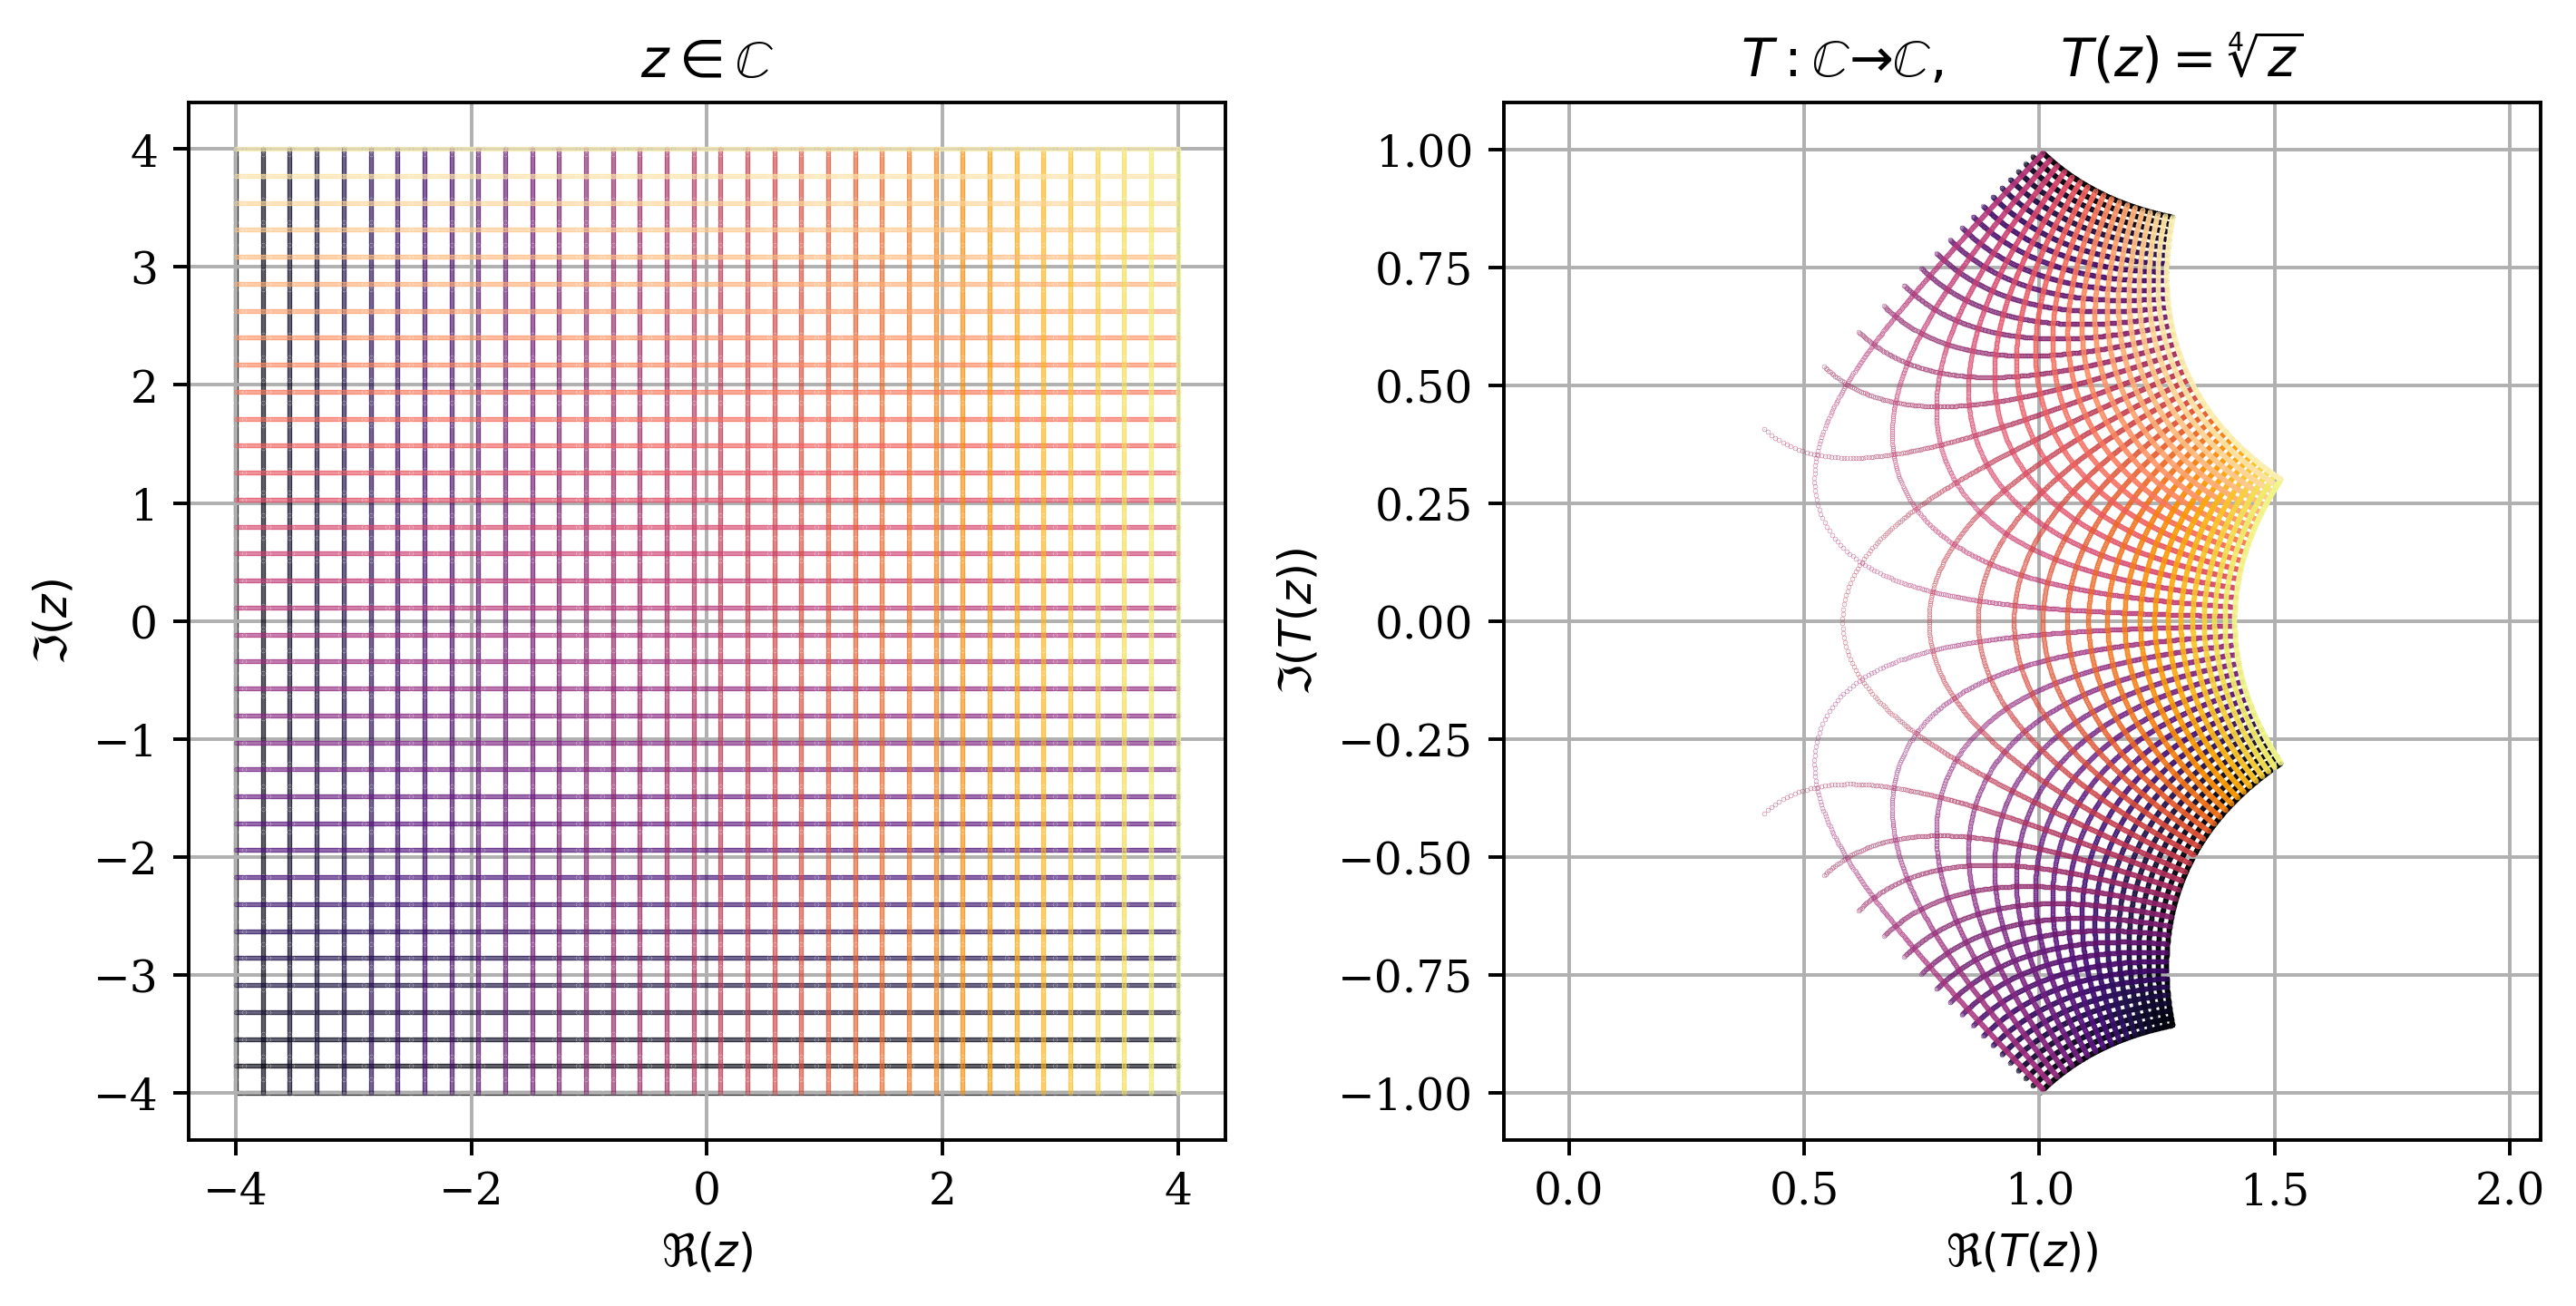

In [ ]:
#@title Ejemplo de Transformación { run: "auto" }
T = "z^(Rational(1, 4))"
grilla = "cartesiana" #@param ["cartesiana", "polar"]
axs = transformar_espacio(T, (-4, 4), 36, 1000, grid=grilla)
plt.show()

# Gráficos Interactivos
Estas funciones reciben como argumento principal otras funciones ($s:\mathbb{N} \to \mathbb{C}$ en el caso de sucesiones, $T:\mathbb{C} \to \mathbb{C}$ en el caso de las transformaciones o $f_n:\mathbb{C} \to \mathbb{C}$ en las sucesiones de funciones). Para darle este tipo de funciones matematicas a python se utilizó la librería de cálculo simbolico sympy para traducir strings (texto) a funciones de la manera más natural posible. Acá abajo dejo algunos ejemplos para hacer más claro el uso de las celdas interactivas.

$\displaystyle s(n) = \frac{i^n}{n} \mapsto$ `(i**n)/n`

$\displaystyle s(n) = ne^{in\pi/3} + 2 \mapsto$ `n*exp(i*n*pi/3) + 2`


$\displaystyle T(z) = z^{\frac{1}{4}} \mapsto$ `z**(1/4)`

$\displaystyle T(z) = \frac{z - i}{z + 1} \mapsto$ `(z - i)/(z + 1)`


$\displaystyle f_n(z) = \frac{e^{inz}}{n} \mapsto$ `exp(i*n*z)/n`

$\displaystyle f_n(z) = \frac{z^n}{n!} \mapsto$ `(z**n)/n!`


$\displaystyle T(z) = \frac{1}{z} - \left\lfloor{\frac{1}{z}}\right\rfloor \mapsto$ `1/z - floor(re(1/z))-i*floor(im(1/z))`

$\displaystyle T(z) = \frac{(z-1)(z+3i)}{(z-3i)(z+1)} \mapsto$ `(z-1)*(z+3*i)/((z-3*i)*(z+1))`

Finalmente, con todos los parametros ingresados, ejecutar la celda con Ctrl+Enter o bien dandole al botón de play al lado del título de la celda.

[]

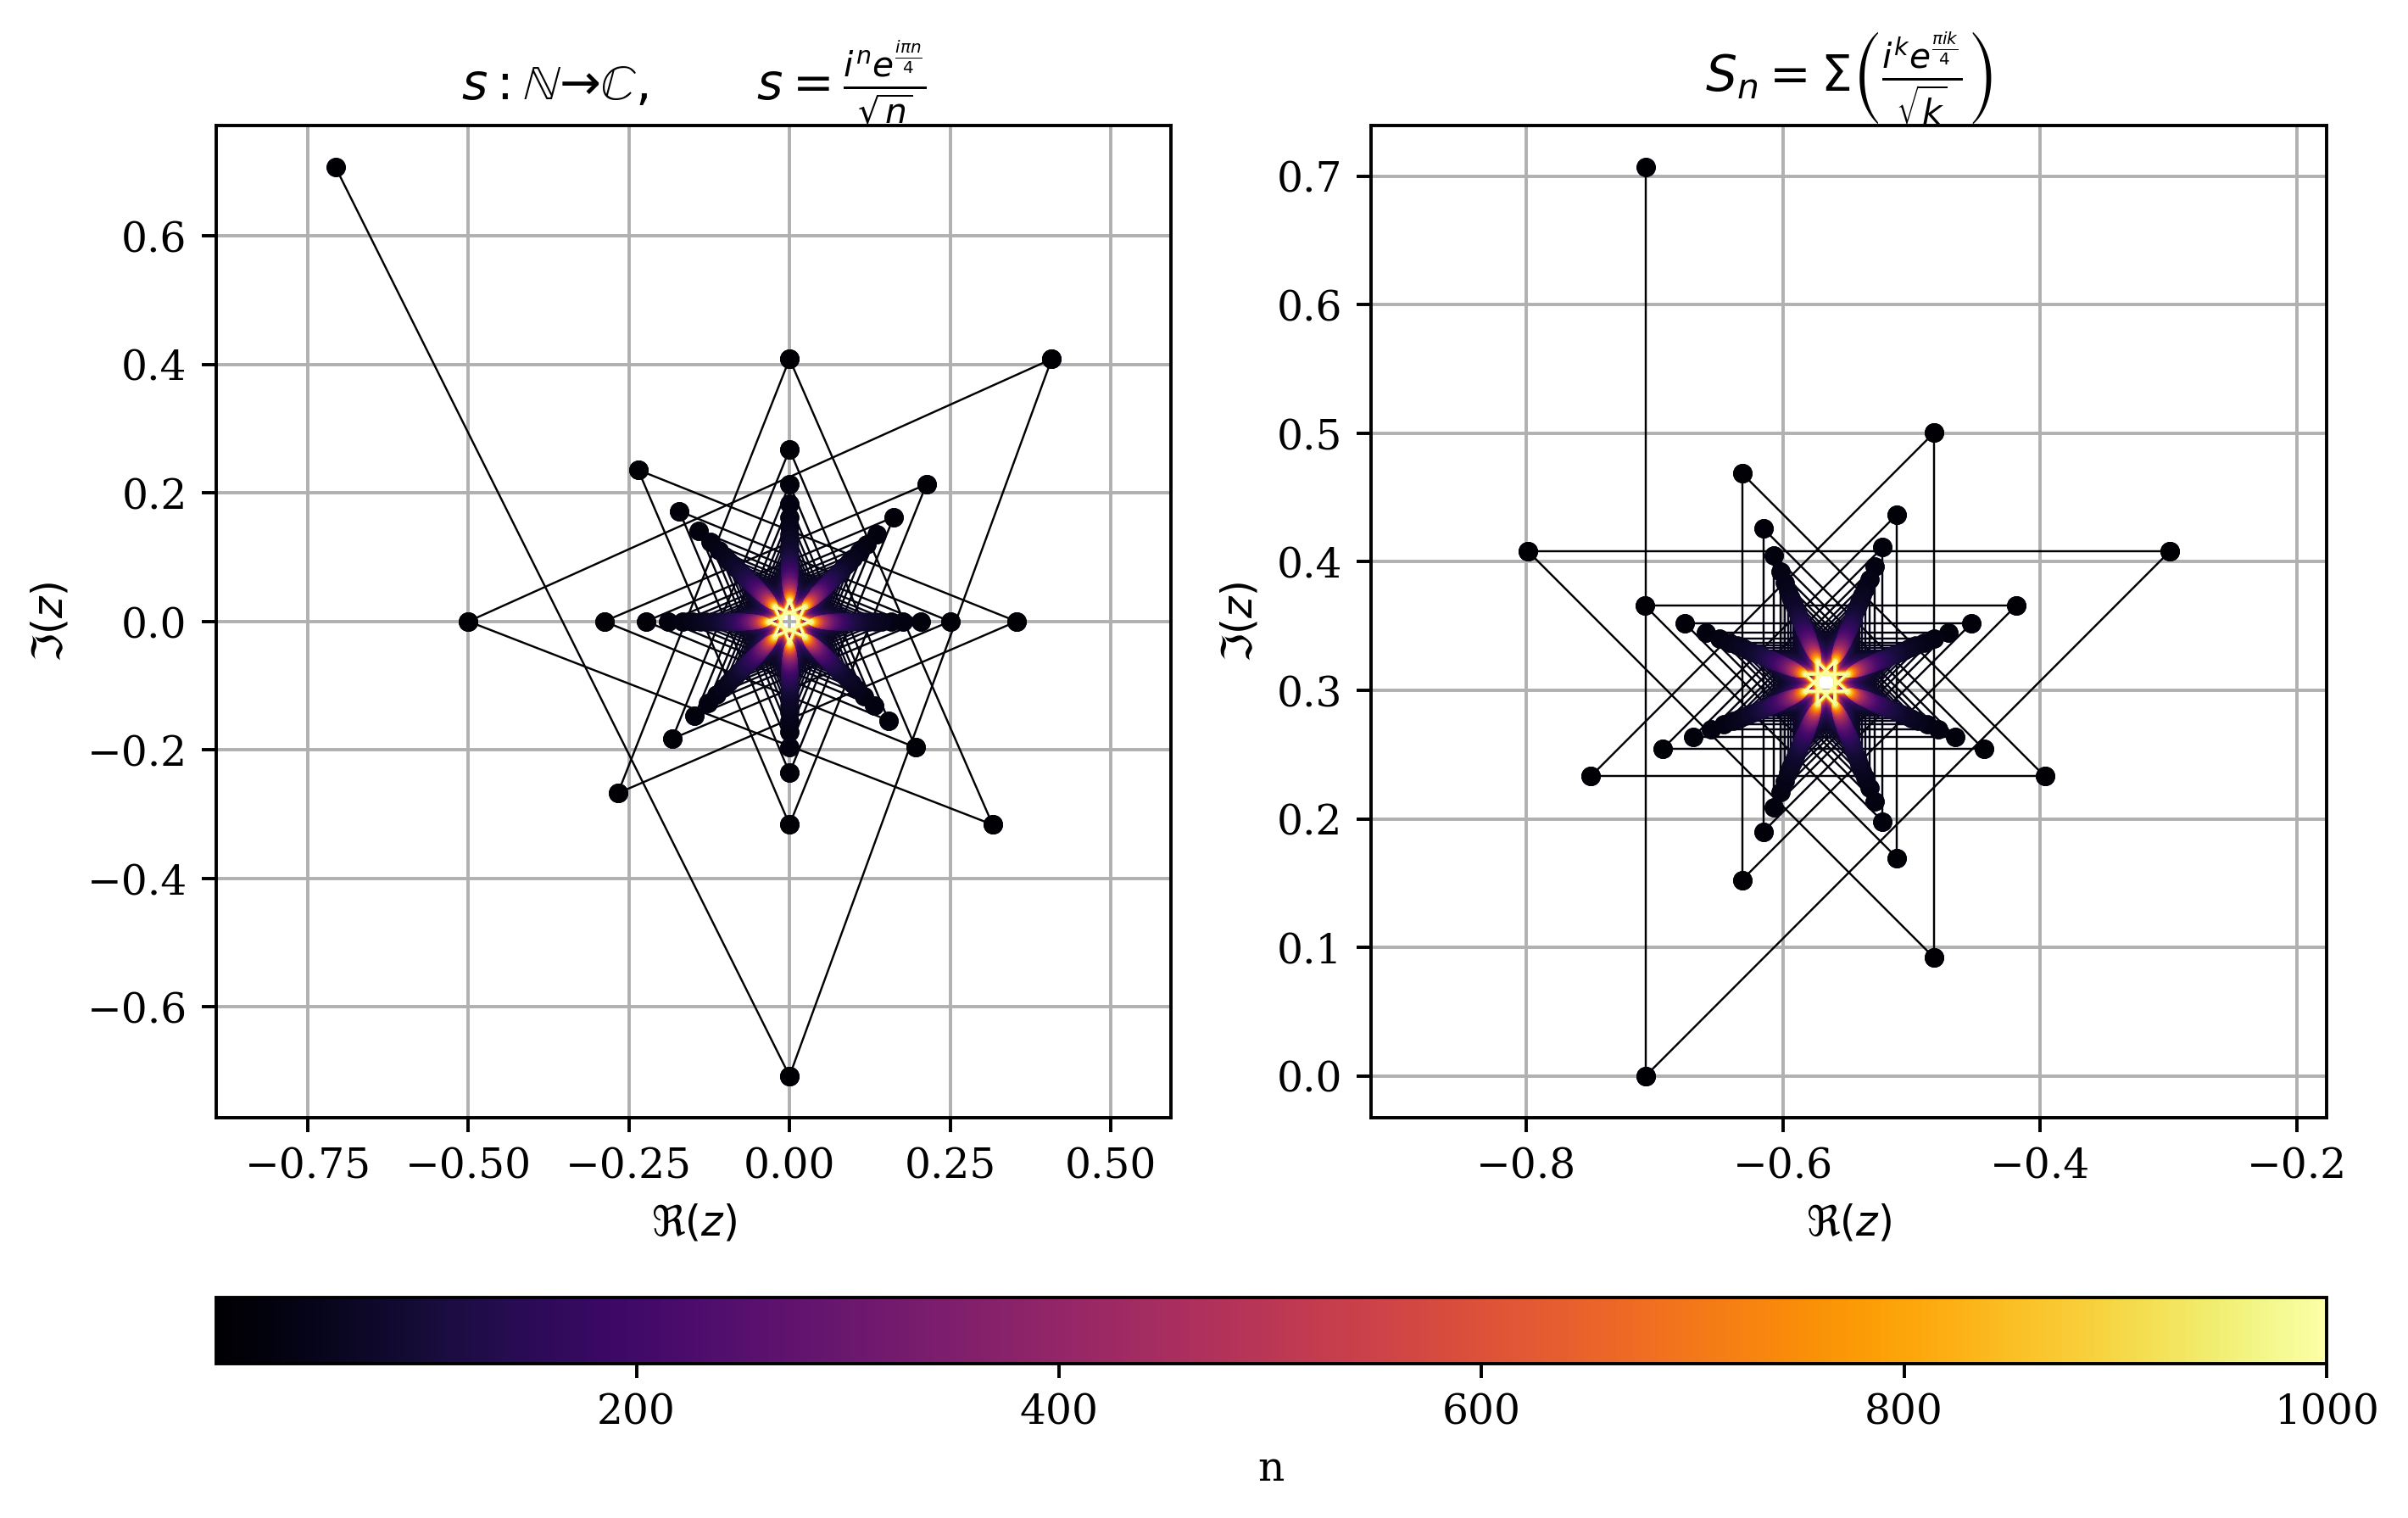

In [ ]:
#@title Graficar la sucesión s { vertical-output: true, display-mode: "form" }
s = "(i**n)*exp(i*n*pi/4)/sqrt(n)" #@param {type:"string"}
#@markdown Función de python de un solo parametro tal que s(n) = z_n,
#@markdown el elemento enésimo de la sucesión.

n_max = 1000  #@param {type:"number"}
#@markdown Máximo valor que tomará n. Es decir, hasta que elemento debe
#@markdown graficarse la sucesión.
suma = True #@param {type:"boolean"}
#@markdown Grafica además la sumatoria S = Σz_k desde n = 1 hasta n = nmax.
colores = "inferno" #@param ["plasma", "magma", "viridis", "cool", "ocean", "hot", "cividis", "jet", "Blues_r", "Greens_r", "Reds_r"] {allow-input: true}
fig, axs = graficar_sucesion(s, n_max, suma, colores)
 
plt.plot()

[]

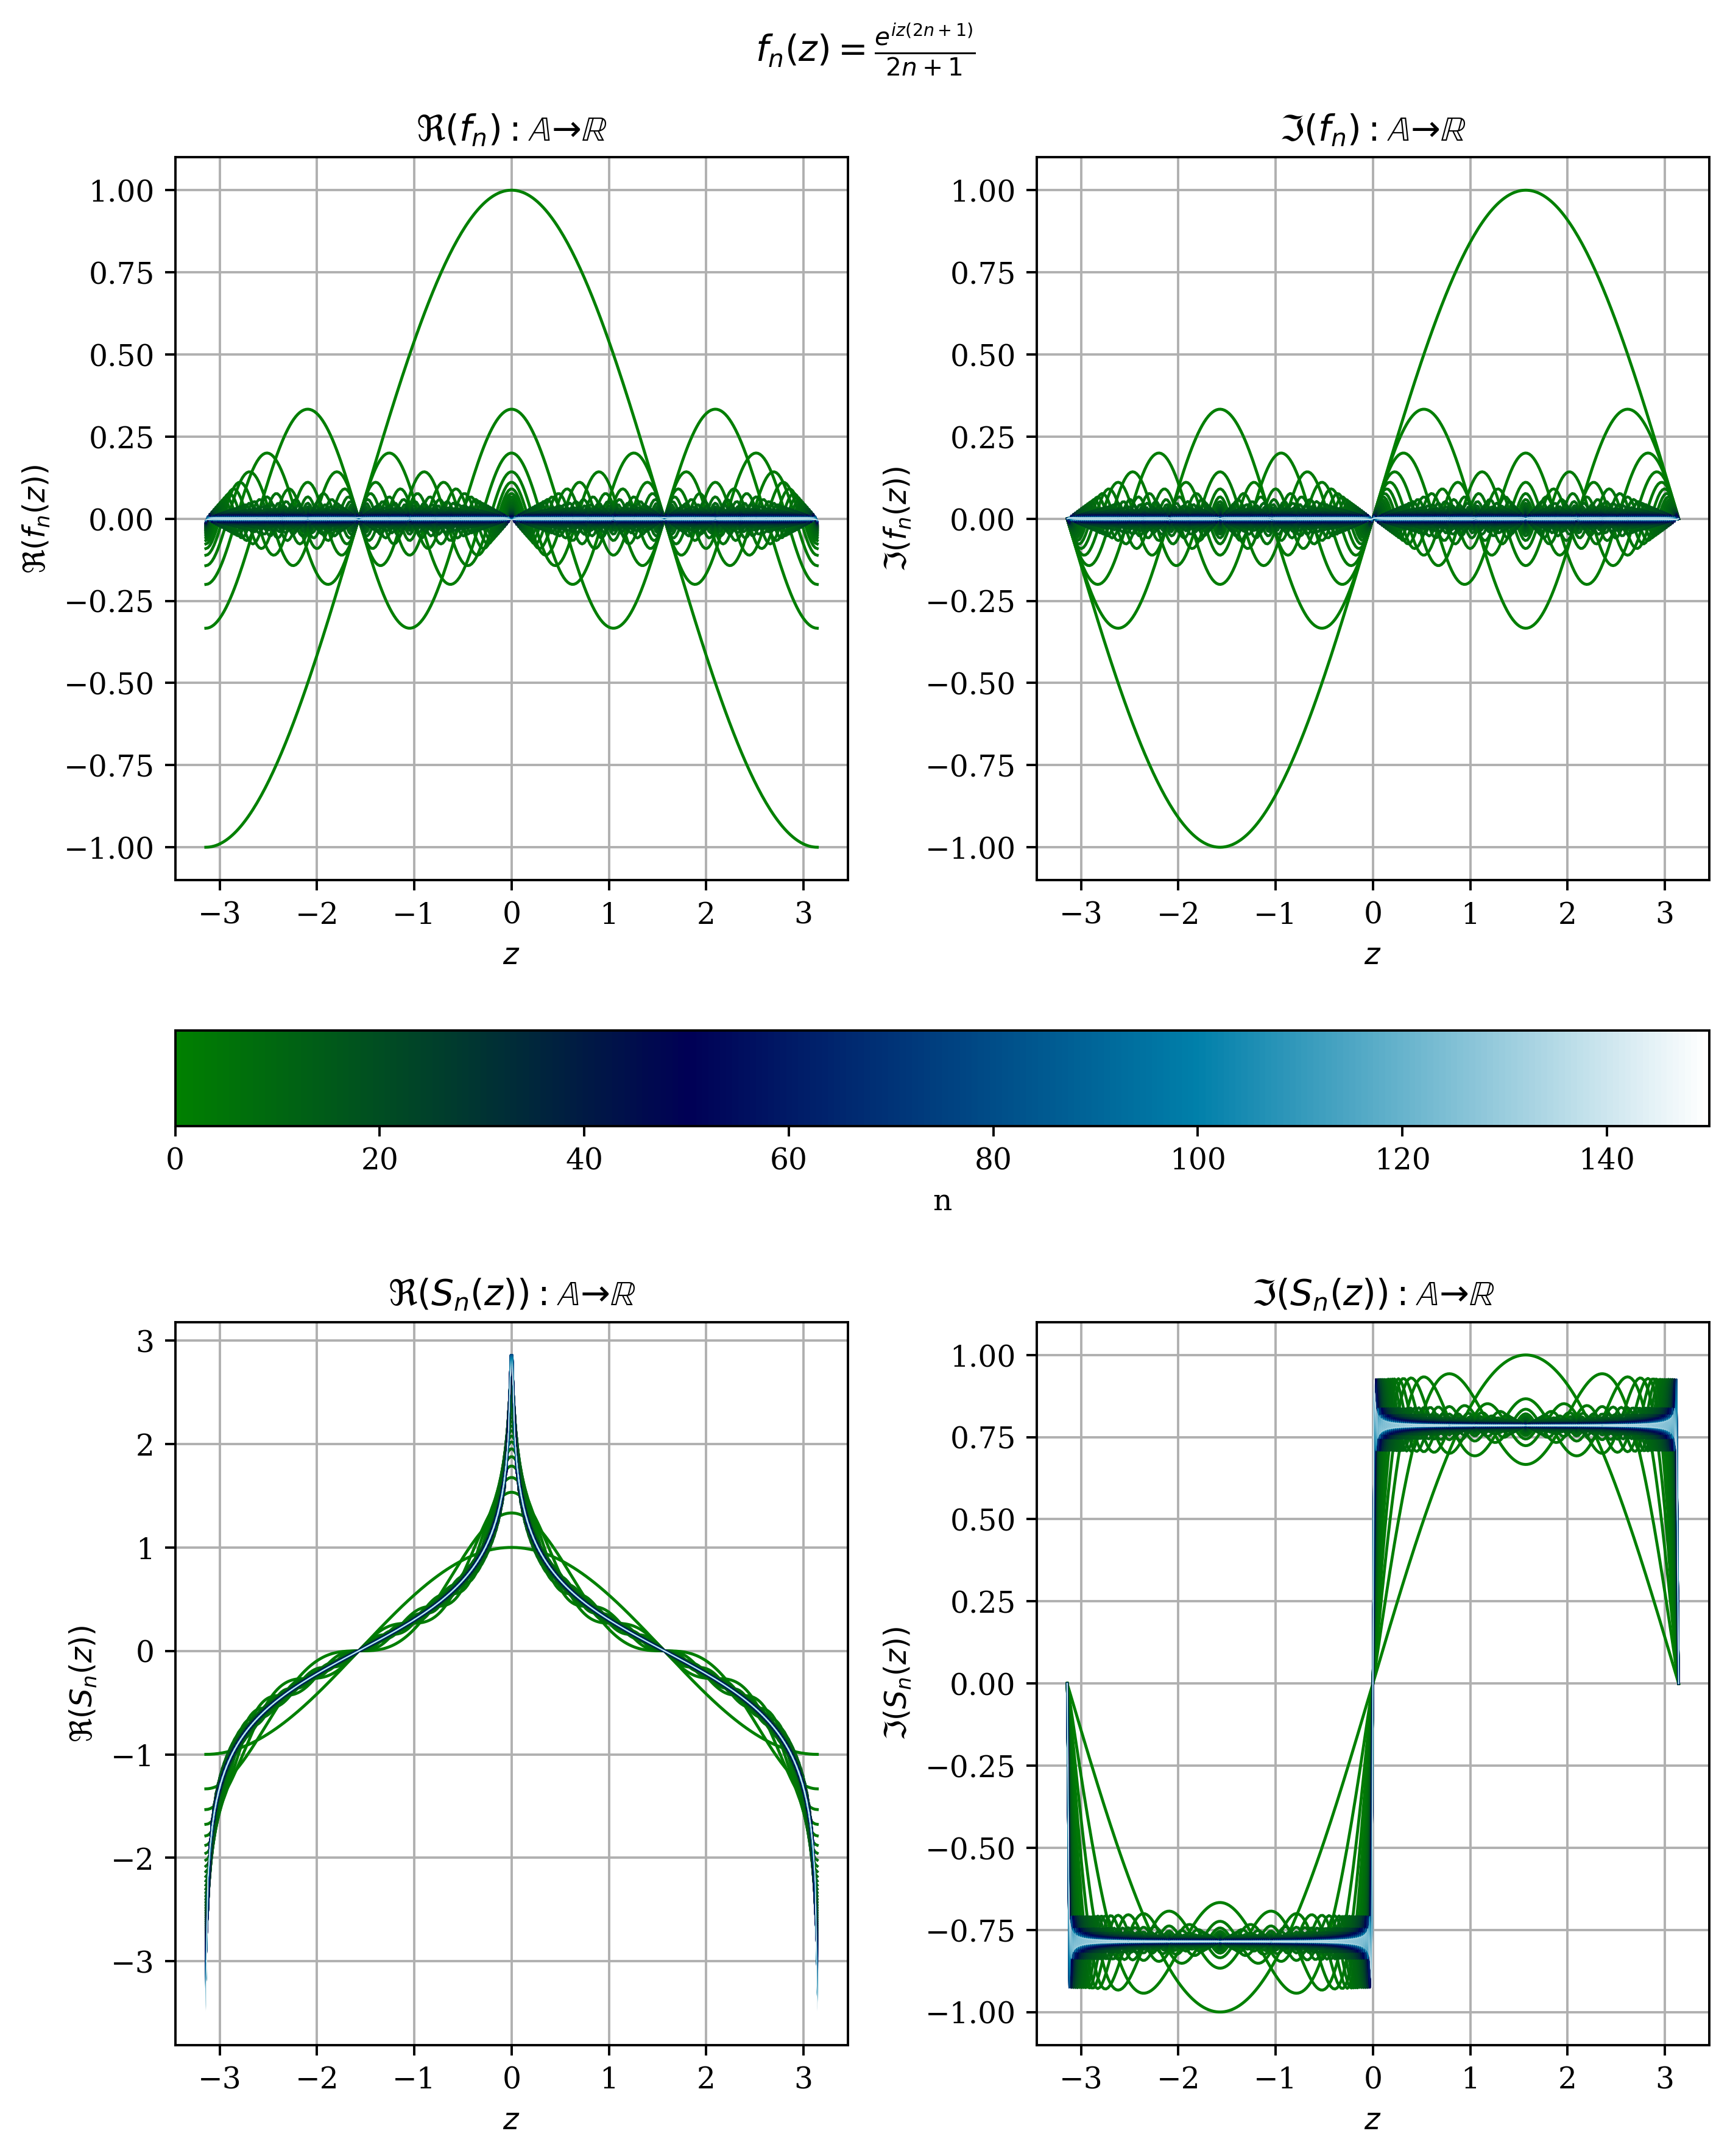

In [ ]:
#@title Graficar la sucesión de funciones fn { vertical-output: true, display-mode: "form" }
fn = "exp(i*(2*n+1)*z)/(2*n+1)" #@param ["z**n", "sin(n*z)/n", "exp(1j*z/n)", "exp(1j*z*n)/(n**2)", "(z**n)/n!", "sin((2*n+1)*z)/(2*n+1)"] {allow-input: true}
#@markdown Función de python de dos parametros parametros tal que
#@markdown fn(n, z) = f_n(z), la n-ésima función de la sucesión evaluada en z.

dominio = np.linspace(-np.pi, np.pi, 300) #@param ["np.linspace(0, 1, 1000)", "np.linspace(0, 2*np.pi, 300)", "np.linspace(-5, 5, 500)"] {type:"raw", allow-input: true}
#@markdown Array de números reales que servirá de dominio para funciones f_n.
#@markdown De forma general, se puede
#@markdown escribir fn(n, Z) --> fn(n, z\*np.exp(1j\*θ)) para que fn tome
#@markdown valores Z sobre la recta de ángulo θ, en este caso, z\*exp(i\*θ)
#@markdown es una parametrización de la recta Z.
theta = "0" #@param ["pi", "3*pi/4", "pi/2", "pi/4", "0"] {allow-input: true}
fn = fn.replace('z', f'(z*exp(i*{theta}))')
n_max = 150 #@param {type:"number"}
#@markdown Máximo valor que tomará n. Es decir, hasta que elemento debe
#@markdown graficarse la sucesión.
n0 =  0#@param {type:"integer"}
#@markdown Mínimo valor que tomará n.
sumatoria = True #@param {type:"boolean"}
colores = "ocean" #@param ["plasma", "magma", "viridis", "cool", "ocean", "hot", "cividis", "jet", "Blues_r", "Greens_r", "Reds_r"] {allow-input: true}
fig, axs = sucesion_de_funciones(fn, dominio, n0, n_max, colores, sumatoria)
fig.set_facecolor('w')
plt.plot()

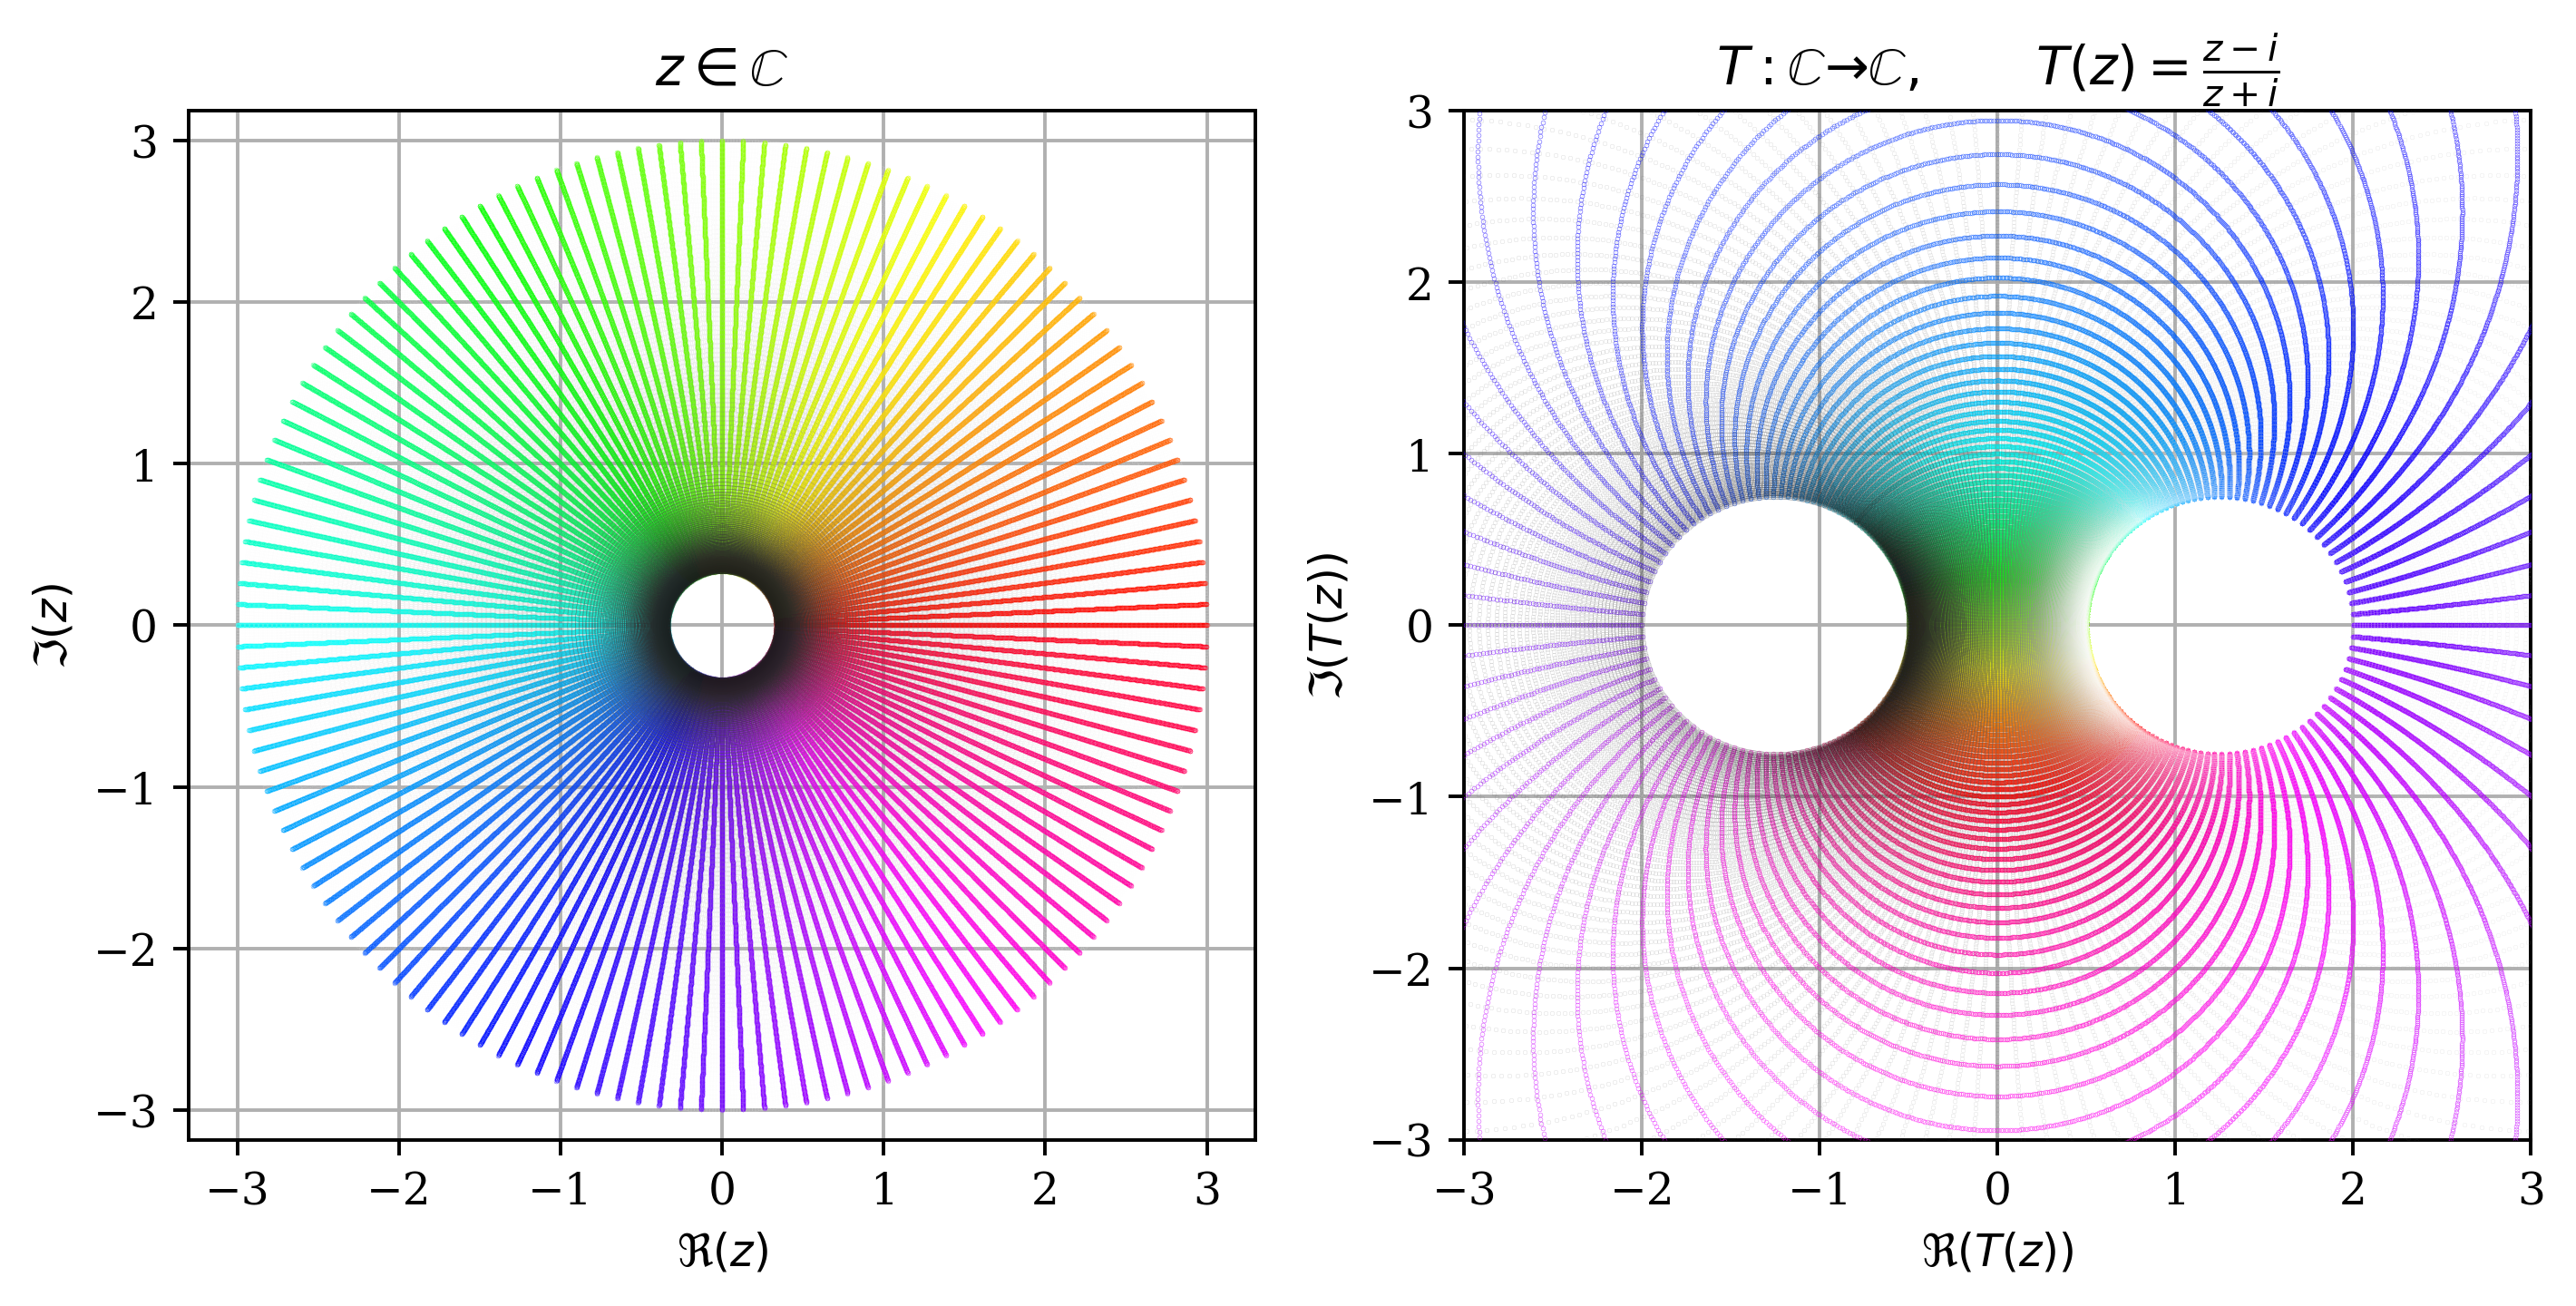

In [ ]:
#@title Transformar el espacio { vertical-output: true, display-mode: "form" }

T = "(z-i)/(z+i)" #@param ["(z-i)/(z+i)", "exp(z)", "z**(1/4)"] {allow-input: true}
#@markdown Función de un solo parametro complejo.
 

grilla = "polar"  #@param ["polar", "cartesiana"]
#@markdown Define si se graficara una cuadricula de rectas ('cartesiana') o una
#@markdown serie de circunferencias y rectas radiales ('polar').
 
dominio = (-3, 3) #@param ["(-3, 3)", "(-30, 30)", "(0, 5)", "(-5, 0)"] {type:"raw", allow-input: true}
#@markdown tupla de 2×2 o lista de dos tuplas de 2×2.
 
#@markdown Limites de la región cuadrada o disco del plano complejo cuya
#@markdown transformación se quiere conocer.
 
#@markdown En el gráfico polar, se conserva el mayor valor de "dom" para
#@markdown definir el radio máximo, mientras que el menor valor
#@markdown o bien se considera para el radio mínimo (si es > 0) o bien se
#@markdown descarta (si es <= 0), en cuyo caso el radio mínimo es el inverso
#@markdown del radio máximo.
 
#@markdown Alternativamente, en el gráfico cartesiano pueden
#@markdown especificarse los valores máximos y mínimos para cada eje por
#@markdown separado especificandolos con una lista de dos tuplas en dom.
 
N =   144#@param {type:"integer"}
#@markdown Cantidad de rectas que se quieren graficar por eje. Es decir,
#@markdown se graficaran 2N rectas en total.
 
#@markdown Alternativamente, cantidad de circunferencias y rectas radiales
#@markdown que se quieren graficar.
 
axs = transformar_espacio(T, dom=dominio, N=N,
                          grid=grilla, )
definir_ejes_salida = True #@param {type:"boolean"}
#@markdown Si no se definen manualmente los ejes, es probable que se obtengan
#@markdown gráficos poco interpretables, con escalas absurdas en muchos casos.
if definir_ejes_salida:
    axs[1].set_aspect('auto')
    lims = (-3, 3) #@param ["(-1, 1)", "(-3, 3)", "(0, 5)", "(-5, 0)", "(-100, 100)"] {type:"raw", allow-input: true}
    axs[1].set_xlim(lims)
    axs[1].set_ylim(lims)
if grilla == 'cartesiana' and isinstance(dominio, tuple):
    axs[0].set_xlim(dominio)
    axs[0].set_ylim(dominio)
plt.show()

###$\text{Comentario sobre el coloreado de dominio}$
Los dos siguientes métodos de visualización utilizan una secuencia de colores (HSV) para indicar el argumento (fase, ángulo) de la imagen de las funciones. Para hacer esto de forma ideal, debería poder indicarle al programa que un argumento de $2\pi$ es exactamente lo mismo que un argumento de $0$ o $-2\pi$ o de hecho $\{2n\pi\}_{n\in\mathbb{Z}}$. Pero por diversos motivos asociados al algoritmo de interpolación de color, ninguna implementación de esto es perfecta.

En este caso, **la imperfección surje como una banda multicolor** relativamente fina que ocupa el espacio entre valores complejos de argumento $0$ y de argumento $\approx 2\pi$. **Esta banda no tiene un motivo relevante al analisis complejo** y simplemente denota un error en el algoritmo de interpolación de color utilizado por las distintas librerías, **y la misma debería ignorarse.**

<string>:2: RuntimeWarning: invalid value encountered in reciprocal


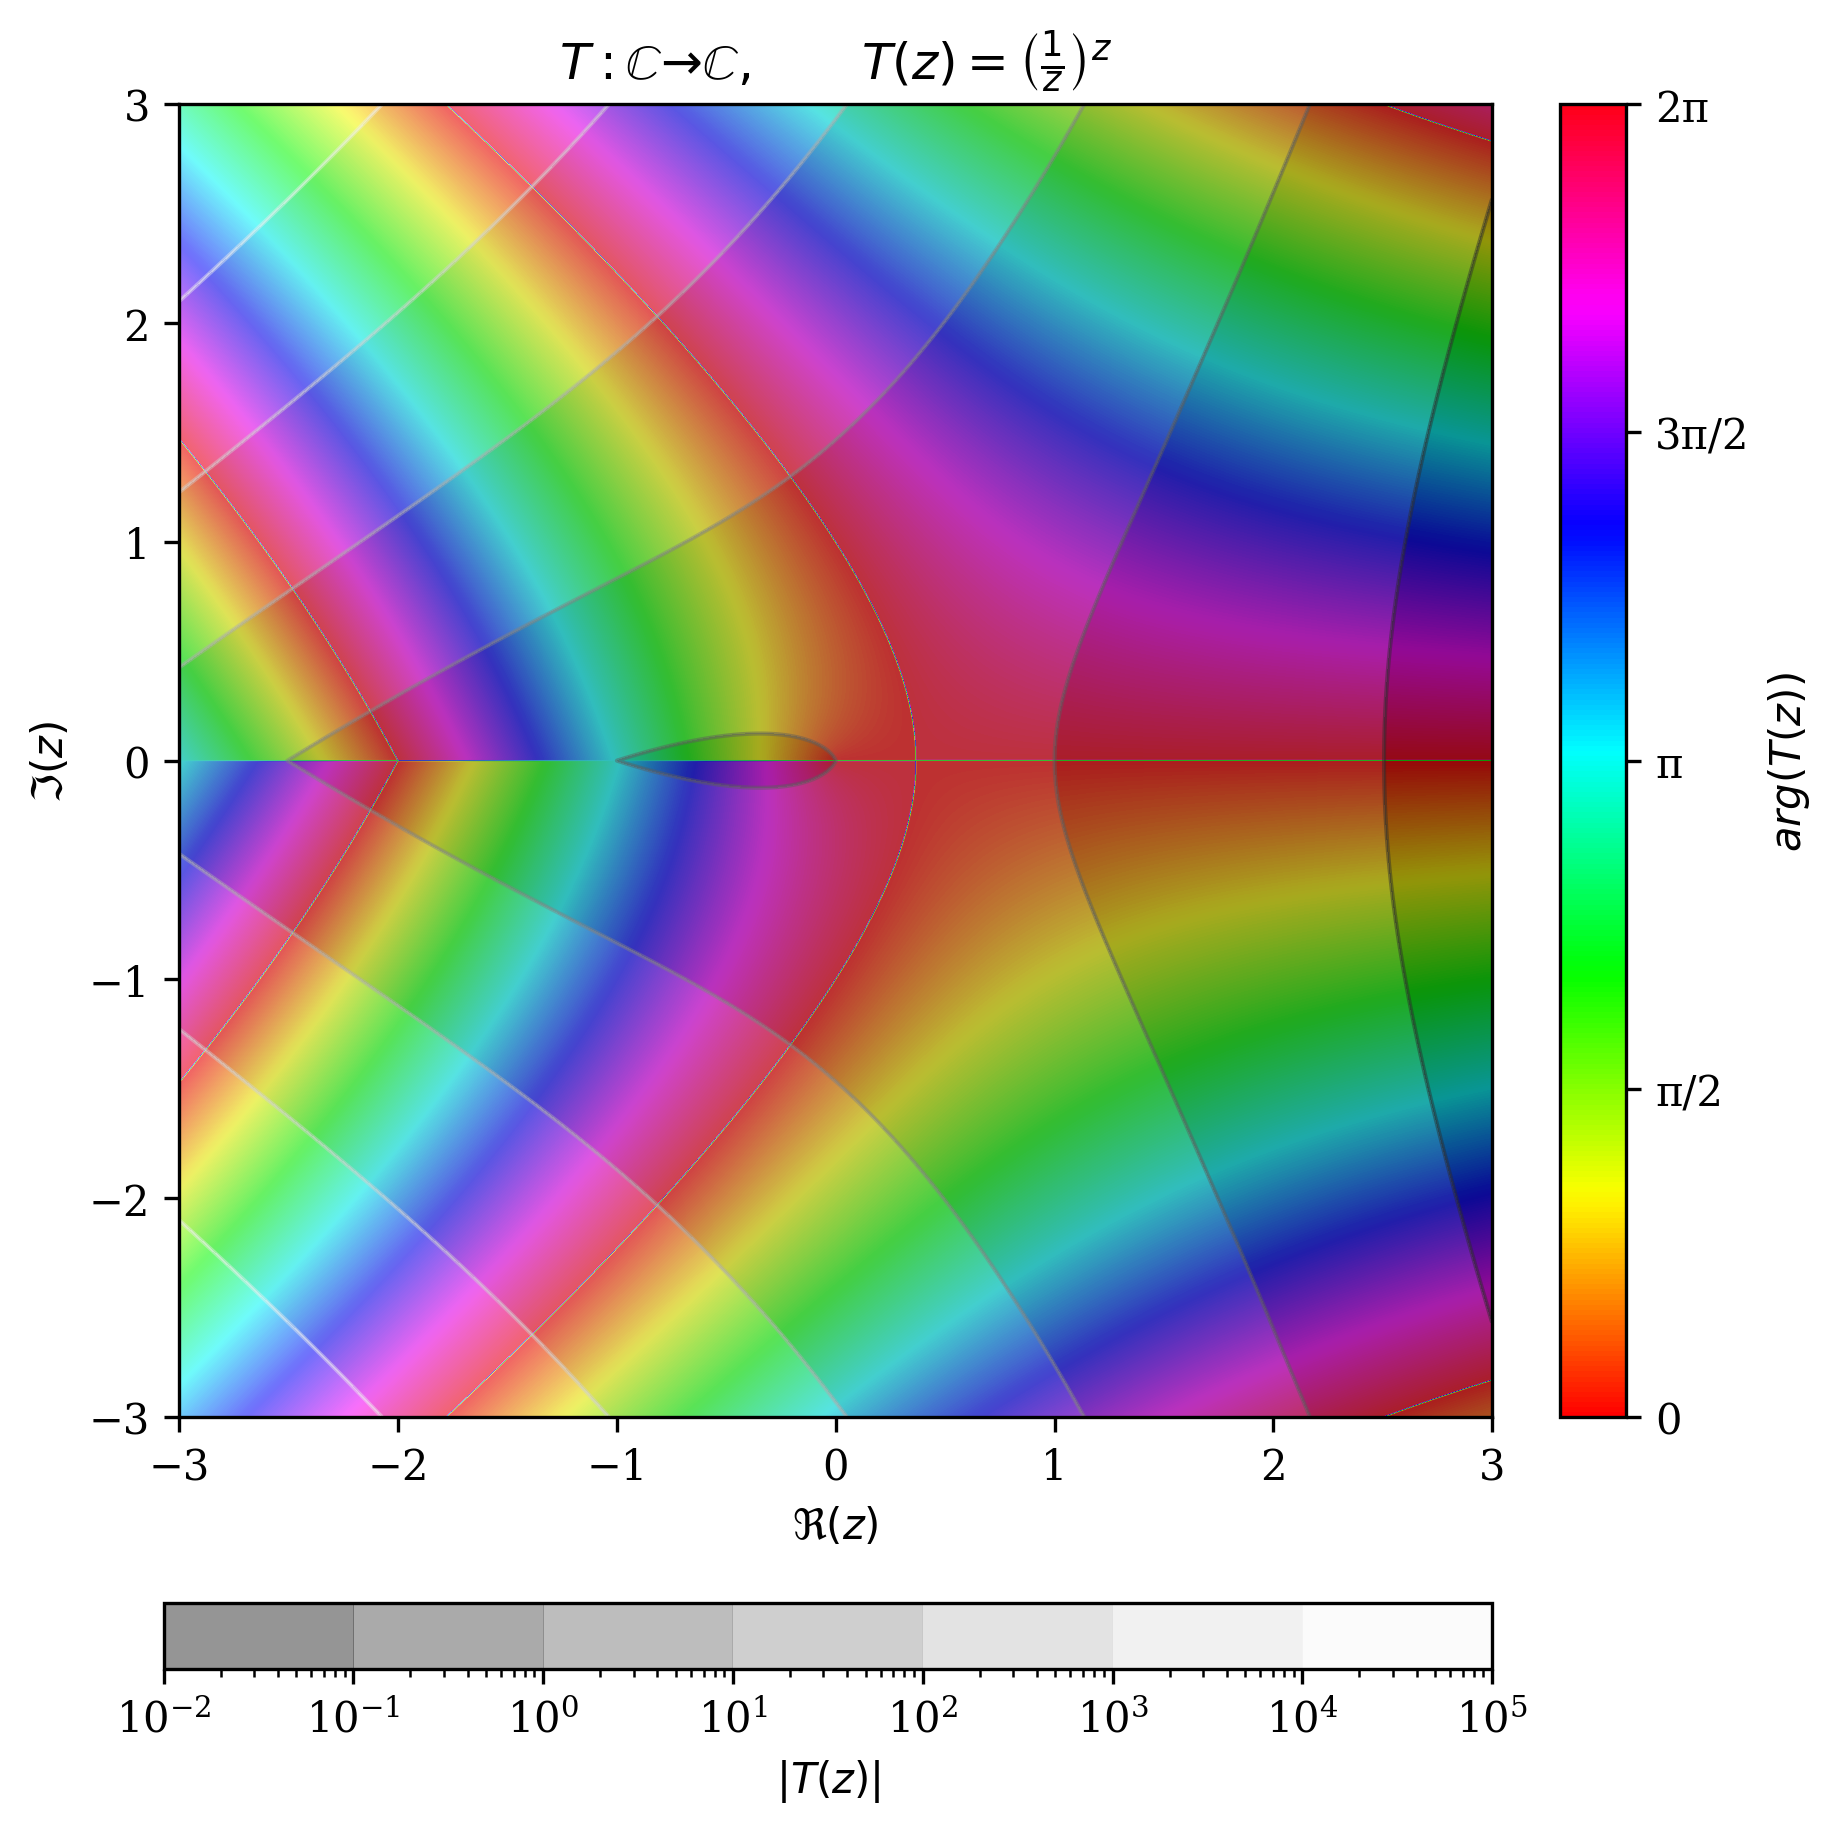

In [ ]:
#@title Coloreado de Dominio { vertical-output: true, display-mode: "form" }
 
T = "(1/z)**z" #@param ["(z-i)/(z+i)", "exp(z)", "log(z)"] {allow-input: true}
#@markdown Función de un solo parametro complejo.
 
 
modulo = "log"  #@param ["lineal", "log", "None"]
#@markdown Define si se colorearán curvas de nivel en escala lineal o logaritmica.
 
dominio = (-3, 3) #@param ["(-3, 3)", "(-30, 30)", "(0, 5)", "(-5, 0)"] {type:"raw", allow-input: true}
#@markdown tupla de 2×2.
#@markdown Limites de la región cuadrada donde se coloreará el dominio.
  
N = 3001 #@param {type:"integer"}
#@markdown Cantidad de puntos que se quieren graficar por eje. Es decir,
#@markdown se graficaran N² puntos en total (y luego el color se interpola entre ellos).
 
ax = coloreado_de_dominio(T, dom=dominio, N=N, modulo=modulo, )
plt.show()

In [16]:
#@title Superficie de Riemann
#@markdown Ejecutar, la interfaz aparece luego.


# Este código es diferente de todo el anterior. Utiliza la librería plotly-dash
app = JupyterDash(__name__,
                  external_scripts=["https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.5/MathJax.js?config=TeX-MML-AM_CHTML" ])

app.layout = html.Div([

    html.H1("Funciones de Variable Compleja \n f:C→C", style={'text-align': 'center'}),
    
    dcc.Markdown("f(x, y) =", style={'backgroundColor':'white'}),
    dcc.Input(id="expresion",
              type="text",
              placeholder="z",
              list="lista",
              debounce=True,
              style={'width': "40%", 'backgroundColor':'white'}),

    html.Datalist(id="lista",
                  children=[html.Option(value="z**2"),
                            html.Option(value="1/z"),
                            html.Option(value="exp(z)"),
                            html.Option(value="cos(z)"),
                            html.Option(value="sin(z)"),
                            html.Option(value="log(z)"),
                            html.Option(value="sqrt(z)"),
                            html.Option(value="arg(z)*exp(i*abs(z))"),
                            html.Option(value="im(z)*exp(i*re(z))")]),
    
    dcc.Markdown("Dominio Re(z):", style={'backgroundColor':'white'}),
    dcc.RangeSlider(id='dom_x', min=-30, max=30, value=[-10, 10], step=0.5,
                    allowCross=True, pushable=2,
                    marks=dict([(x, str(x)) for x in range(-30, 30+1, 5)])),
    
    dcc.Markdown("Dominio Im(z):", style={'backgroundColor':'white'}),
    dcc.RangeSlider(id='dom_y', min=-30, max=30, value=[-10, 10], step=0.5,
                    allowCross=True, pushable=2,
                    marks=dict([(x, str(x)) for x in range(-30, 30+1, 5)])),
    
    html.Div(id='rango', children=[], style={'backgroundColor':'white'}),
        
    dcc.Markdown("Resolución:", style={'backgroundColor':'white'}),
    dcc.Slider(id='resolution', min=25, max=300, step=5, value=75,
               marks={25: '25', 50: '50', 75: '75', 100: '100', 125: '125', 150: '150',
                      175: '175', 200: '200', 225: '225', 250: '250', 275: '275', 300: '300',},),
    
    dcc.Markdown("Altura:", style={'backgroundColor':'white'}),
    dcc.Dropdown(id="altura", #La id es con lo que despues vamos a buscar a este Dropdown. Es una forma CSS-esca de guardar "objetos"
                 value="abs_lineal", #El valor que representa por defecto
                 options=[{'value': x, 'label': x} for x in ['abs_lineal', 'abs_log', 'Re', 'Im']],
                 style={'width': "40%", 'backgroundColor':'white'}),
    
    html.Br(),

    dcc.Graph(id='surface', figure={}, style=dict(height=1000, width=1000))

])


# Connect the Plotly graphs with Dash Components
@app.callback(
    [Output(component_id='rango', component_property='children'),
     Output(component_id='surface', component_property='figure'),],
    [Input(component_id='expresion', component_property='value'),
     Input(component_id='dom_x', component_property='value'),
     Input(component_id='dom_y', component_property='value'),
     Input(component_id='resolution', component_property='value'),
     Input(component_id='altura', component_property='value'),]
)
def update_graph(expr, dom_x, dom_y, res, height):
    if expr is None:
        expr = "z"
    dominio = f'(Re(z), Im(z))∈{dom_x}×{dom_y}'
    fig = superficie_de_riemann(expr, dom_re=dom_x, dom_im=dom_y, N=int(res), altura=height)

    return dominio, fig, 


# ------------------------------------------------------------------------------

app.run_server(mode='inline', port=8030)

# fig = superficie_de_riemann('(z**2 + 1)/(z**2 - 1)', dom=(-2, 2), N=100, altura='abs_lineal')
# fig.show()

<IPython.core.display.Javascript object>

Eq(f(x), x**3/(x**2 + 1)**2)

Eq(\mathcal{F}(f)(k), -I*pi*(2 - Abs(k))*exp(-Abs(k))*sign(k)/2)

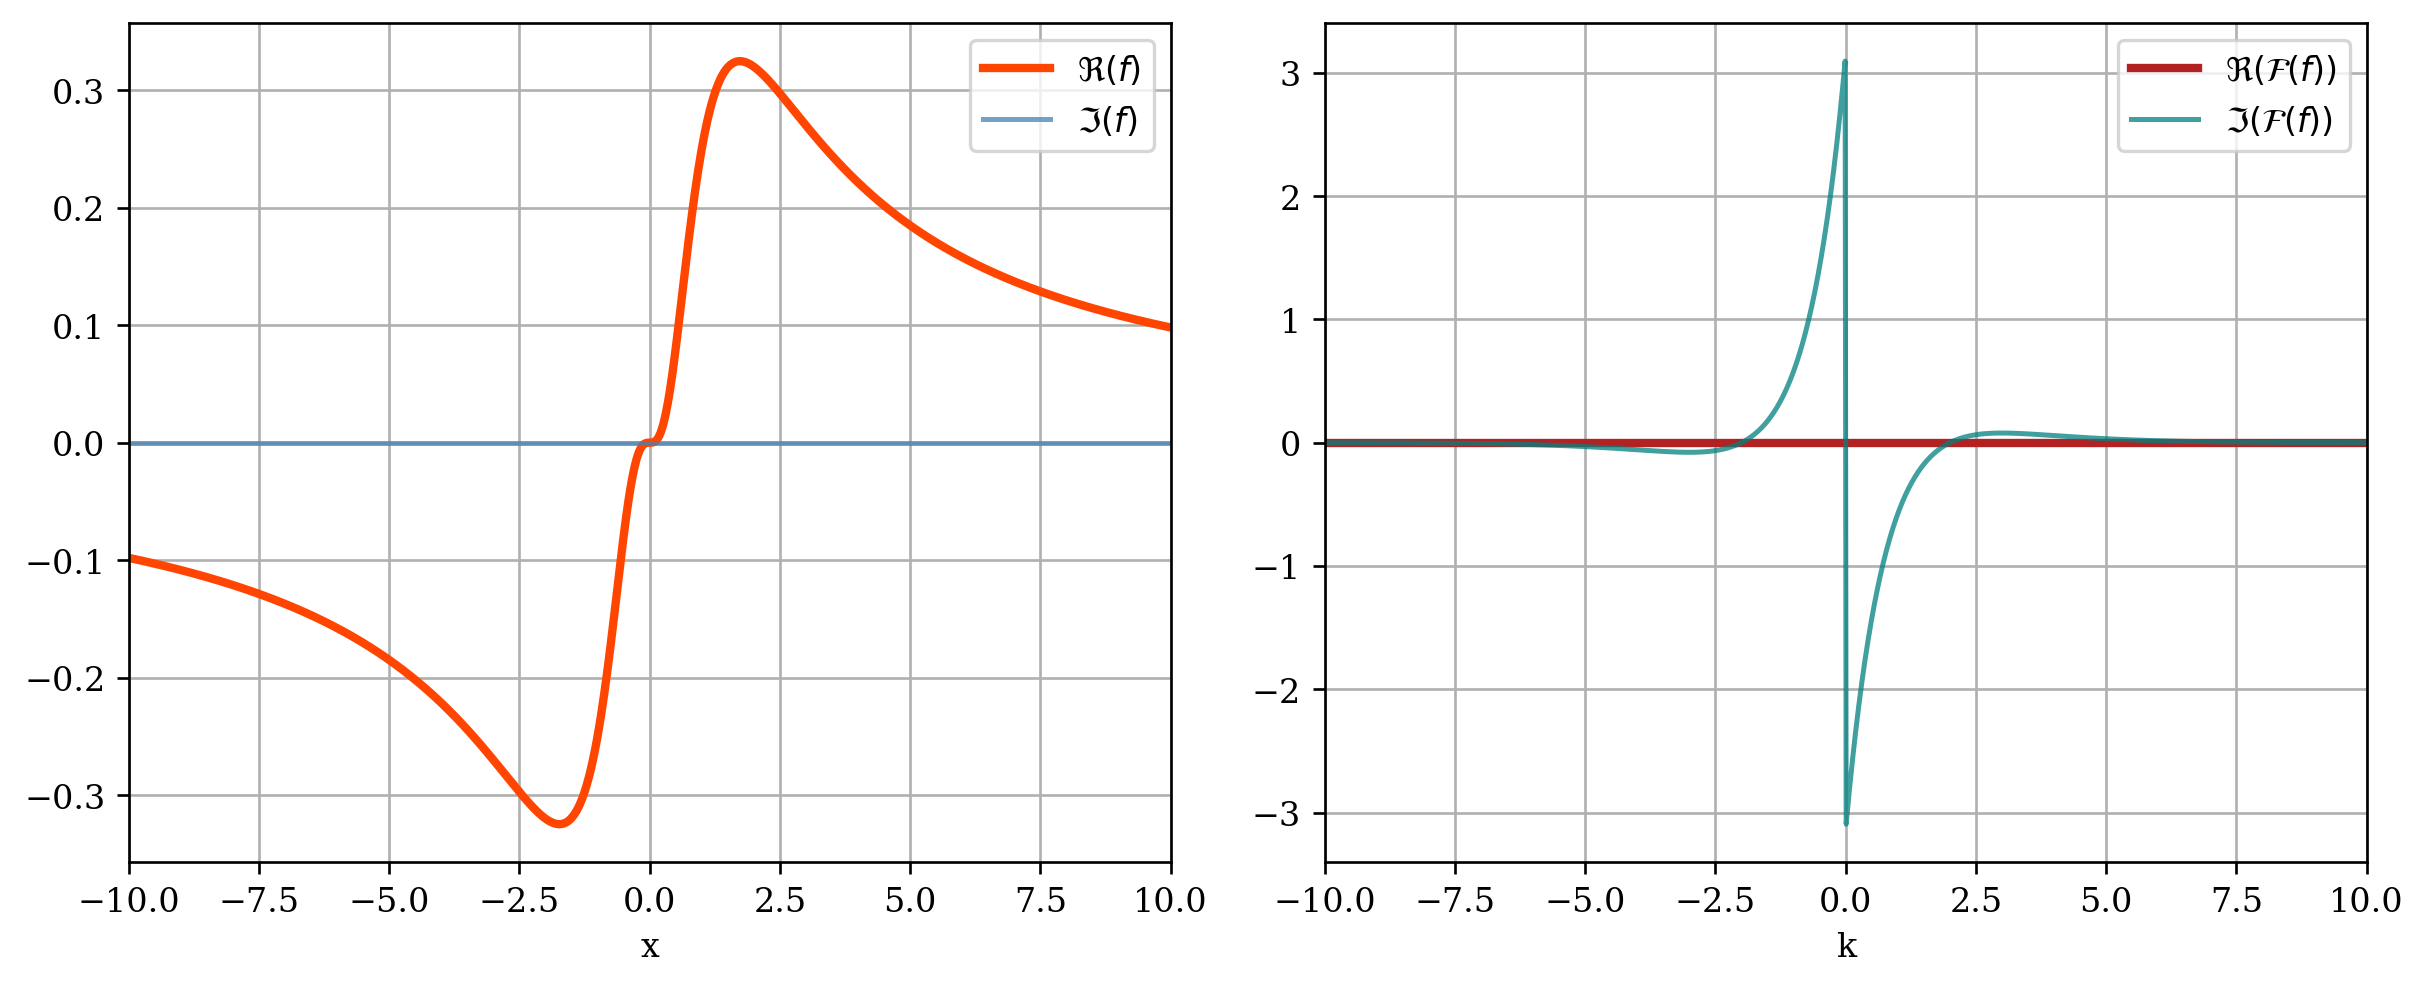

In [ ]:
#@title Transformada de $\mathcal{Fourier}$ { vertical-output: true }
# Algunos diccionarios y listas que son utilizados varias veces.
subs_dict = {'x': x, 'k': k, 'a': a, 'b': b, 'c': c,
             'i': sym.I, 'e': sym.E, 'pi': sym.pi,
             'abs': sym.Abs, 'sen': sym.sin, 'Sign': sym.sign}
num_func_list = ['numpy', {'factorial': factorial, 'sen': np.sin, 'Sign': np.sign,}]
# Defino temporalmente un dominio simbólico.
x, k = sym.symbols('x, k', real=True)
a = sym.symbols('a', real=True, positive=True)
b = sym.symbols('b', real=True)
c = sym.symbols('c', complex=True)
#@markdown Expresión de la función a transformar. Debe estar en función de 'x', y puede contener las constantes:
#@markdown 'a' un número real positivo, 'b' un número real, 'c' un número complejo.
# Recibo como input un string que representa la función.
f = "x**3/((1+x**2)**2)" #@param ["exp(-Abs(x))", "exp(-a*x**2)", "1/(1+x**2)", "Piecewise((1, Abs(x) <= 1), (0, True))", "x**3/((1+x**2)**2)"] {allow-input: true}
# Obtengo una versión simbólica de la función f
f_sym = sym.sympify(f, evaluate=True).subs(subs_dict)
#@markdown Método de cálculo de la transformada:

#@markdown "Simbólica": Utiliza Sympy para integrar la expresión simbolica de f.
#@markdown obs: Puede y suele fallar.

#@markdown "Analítica": Debe calcularse a mano, luego el programa solamente la grafica.
transformada = "Analitica" #@param ["Simbolica", "Analitica"]
if transformada == 'Simbolica':
    F_sym = sym.fourier_transform(f_sym, x, k/(2*sym.pi))
elif transformada == 'Analitica':
    #@markdown Si se elije la opción Analitica, debe especificarse la expresión de la transformada en función de 'k'.
    F = "-sign(k)*i*pi*(2-Abs(k))*exp(-Abs(k))/2" #@param ["2/(k**2 + 1)", "sqrt(pi)*exp(-k**2/(4*a))/sqrt(a)", "pi*exp(-Abs(k))", "2*sin(k)/k", "-sign(k)*i*pi*(2-Abs(k))*exp(-Abs(k))/2"] {allow-input: true}
    F_sym = sym.sympify(F, evaluate=False).subs(subs_dict)

# Defino variables y constantes numéricas
pi = np.pi
#@markdown Limites de los dominios reales para los gráficos de la función y su transformada respectivamente.
dominio_x = [-10, 10] #@param ["[-1, 1]", "[-pi, pi]", "[-5, 5]", "[-10, 10]", "[-20, 20]"] {type:"raw", allow-input: true}
dominio_k = [-10, 10] #@param ["[-1, 1]", "[-pi, pi]", "[-5, 5]", "[-10, 10]", "[-20, 20]"] {type:"raw", allow-input: true}
x_num = np.linspace(dominio_x[0], dominio_x[-1], 1000)
k_num = np.linspace(dominio_k[0], dominio_k[-1], 1000)
a_num = 3  #@param
if a_num <= 0:
    raise ValueError("'a_num' debe ser un número real mayor que 0")
b_num = -1  #@param
if b_num.imag != 0:
    raise ValueError("'b_num' debe ser un número real")
c_num = 0+1j #@param
# Transformo las expresiones simbolicas a numéricas
f_num = sym.lambdify([x, a, b, c], f_sym, num_func_list)(x_num, a_num, b_num, c_num)
try:
    F_num = sym.lambdify([k, a, b, c], F_sym, num_func_list)(k_num, a_num, b_num, c_num)
except NameError:
    raise ValueError("O bien hubo un problema al utilizar cálculo simbolico para " +
                     "calcular la transformada de Fourier de la función 'f' o bien " +
                     "sympy no reconoce la expresión ingresada manualmente en 'F'." +
                     "Probar reescribiendo la expresión o calculando " +
                     "el resultado a mano, ingresarlo como F y cambiar el " +
                     "método de 'transformada' a 'Analitica'.")
#@markdown Fuerza la propiedad de paridad e imparidad de la transformada de fourier
#@markdown de funciones reales, corrigiendo posibles errores en las expresiones
#@markdown calculadas simbolicamente. A la vez, podría introducir errores inesperados.
probar_correcion = False  #@param {type:"boolean"}
if probar_correcion:
    if (f_num.imag < 1e-16).all():
        # si además F_num es solo real, forzar F_sym par con subs x -> |x|
        if (F_num.imag < 1e-16).all():
            F_sym = F_sym.subs(k, sym.Abs(k))
            F_num = sym.lambdify([k, a, b, c], F_sym, num_func_list)(k_num, a_num, b_num, c_num)
        # si además F_num es solo imaginario, forzar F_sym impar con Piecewise
        if (F_num.real < 1e-16).all():
            F_sym = sym.Piecewise((F_sym, k >= 0), (-F_sym.subs(k, -k), k < 0))
            F_num = sym.lambdify([k, a, b, c], F_sym, num_func_list)(k_num, a_num, b_num, c_num)
        # sino, forzar para parte real e imaginarias por separado. Sacrifica expresión.
# Muestro en latex la expresión ingresada y la de su transformada
display(sym.Eq(sym.symbols('f(x)'), f_sym))
display(sym.Eq(sym.symbols(r'\mathcal{F}(f)(k)'), F_sym))
# Ploteo parte real e imaginaria de la función y su transformada
fig, axs = plt.subplots(1, 2, dpi=120, constrained_layout=True)
fig.set_size_inches(10, 4)
ax = axs[0]
ax.plot(x_num, f_num.real, 'orangered', lw=2.5, label=r'$\Re(f)$')
ax.plot(x_num, f_num.imag, 'steelblue', alpha=0.75, label=r'$\Im(f)$')
ax.grid()
ax.legend()
ax.set_xlabel('x')
ax.set_xlim(dominio_x[0], dominio_x[-1])

ax = axs[1]
polar = False  #@param {type:"boolean"}
if polar:
    ax.plot(k_num, np.abs(F_num), c='forestgreen', lw=2.5, label=r'$|\mathcal{F}(f)|$')
    ax.plot(k_num, np.angle(F_num), c='darkviolet', alpha=0.75, label=r'$Arg(\mathcal{F}(f))$')
else:
    ax.plot(k_num, F_num.real, 'firebrick', lw=2.5, label=r'$\Re(\mathcal{F}(f))$')
    ax.plot(k_num, F_num.imag, 'teal', alpha=0.75, label=r'$\Im(\mathcal{F}(f))$')
ax.grid()
ax.legend()
ax.set_xlabel('k')
ax.set_xlim(dominio_k[0], dominio_k[-1])
plt.show()
